In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from scipy.stats import chi2_contingency, mannwhitneyu, kruskal, f_oneway
from statsmodels.stats.multicomp import MultiComparison

In [2]:
RUTA = "../data/"

In [3]:
df_meta = pd.read_csv(RUTA + "SindromeMetabolico_Limpio.csv")
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2401 non-null   int64  
 1   Sex                2401 non-null   object 
 2   Marital            2401 non-null   object 
 3   Income             2401 non-null   float64
 4   Race               2401 non-null   object 
 5   WaistCirc          2401 non-null   float64
 6   BMI                2401 non-null   float64
 7   Albuminuria        2401 non-null   int64  
 8   UrAlbCr            2401 non-null   float64
 9   UricAcid           2401 non-null   float64
 10  BloodGlucose       2401 non-null   int64  
 11  HDL                2401 non-null   int64  
 12  Triglycerides      2401 non-null   int64  
 13  MetabolicSyndrome  2401 non-null   int64  
 14  Nulo_marital       2401 non-null   bool   
 15  Nulo_income        2401 non-null   bool   
dtypes: bool(2), float64(5), 

### Análisis univariante de las columnas categóricas

In [4]:
#Creamos dos listas, una con las variables numéricas y otra con las variables categóricas que ya hemos clasificado anteriormente
columnas_numericas = ["Age", "WaistCirc","BMI","UrAlbCr","UricAcid","BloodGlucose","HDL","Triglycerides","Income"]
columnas_categoricas = ["Sex", "Marital", "Race", "MetabolicSyndrome", "Albuminuria"]

In [5]:
# Muestro los valores absolutos de cada variable categórica que me sirve para ver la moda en éstos valores
for categoria in columnas_categoricas:
    print(f"Para {categoria}")
    print(25*"*")
    print(df_meta[categoria].value_counts())
    print(25*"*")
    print()
    

Para Sex
*************************
Sex
Female    1211
Male      1190
Name: count, dtype: int64
*************************

Para Marital
*************************
Marital
Married      1192
Single        498
Divorced      242
Unk           208
Widowed       166
Separated      95
Name: count, dtype: int64
*************************

Para Race
*************************
Race
White          933
Black          548
Asian          349
Hispanic       257
MexAmerican    253
Other           61
Name: count, dtype: int64
*************************

Para MetabolicSyndrome
*************************
MetabolicSyndrome
0    1579
1     822
Name: count, dtype: int64
*************************

Para Albuminuria
*************************
Albuminuria
0    2089
1     254
2      58
Name: count, dtype: int64
*************************



In [6]:
# Muestro los valores de frecuencia relativa para cada variable categórica
for categoria in columnas_categoricas:
    print(f"Para {categoria}")
    print(25*"*")
    print(df_meta[categoria].value_counts()/len(df_meta)*100)
    print(25*"*")
    print()
    

Para Sex
*************************
Sex
Female    50.437318
Male      49.562682
Name: count, dtype: float64
*************************

Para Marital
*************************
Marital
Married      49.645981
Single       20.741358
Divorced     10.079134
Unk           8.663057
Widowed       6.913786
Separated     3.956685
Name: count, dtype: float64
*************************

Para Race
*************************
Race
White          38.858809
Black          22.823823
Asian          14.535610
Hispanic       10.703873
MexAmerican    10.537276
Other           2.540608
Name: count, dtype: float64
*************************

Para MetabolicSyndrome
*************************
MetabolicSyndrome
0    65.764265
1    34.235735
Name: count, dtype: float64
*************************

Para Albuminuria
*************************
Albuminuria
0    87.005414
1    10.578925
2     2.415660
Name: count, dtype: float64
*************************



In [7]:
def frequencias_absolutas(dataframe, columnas_categoricas):
    """
    Función que dado un dataframe y una lista con las columnas categóricas de éste
    pinta los gráficos de frecuencia absoluta de cada columna con sus valores anotados 
    """
    num_cols = len(columnas_categoricas)
    num_filas = (num_cols // 2) + (num_cols % 2)
    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 
    for i, col in enumerate(columnas_categoricas):
        ax = axes[i] if num_cols > 1 else axes
        freq = dataframe[col].value_counts()
        barra = sns.barplot(x=freq.index, y=freq, ax=ax, palette='cool', hue = freq.index, legend = False)
        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('Categorías')
        ax.set_ylabel('Frecuencia Absoluta')
        ax.tick_params(axis='x', rotation=45)

        for index, value in enumerate(freq):
            barra.text(index, value + 0.1, str(value), ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

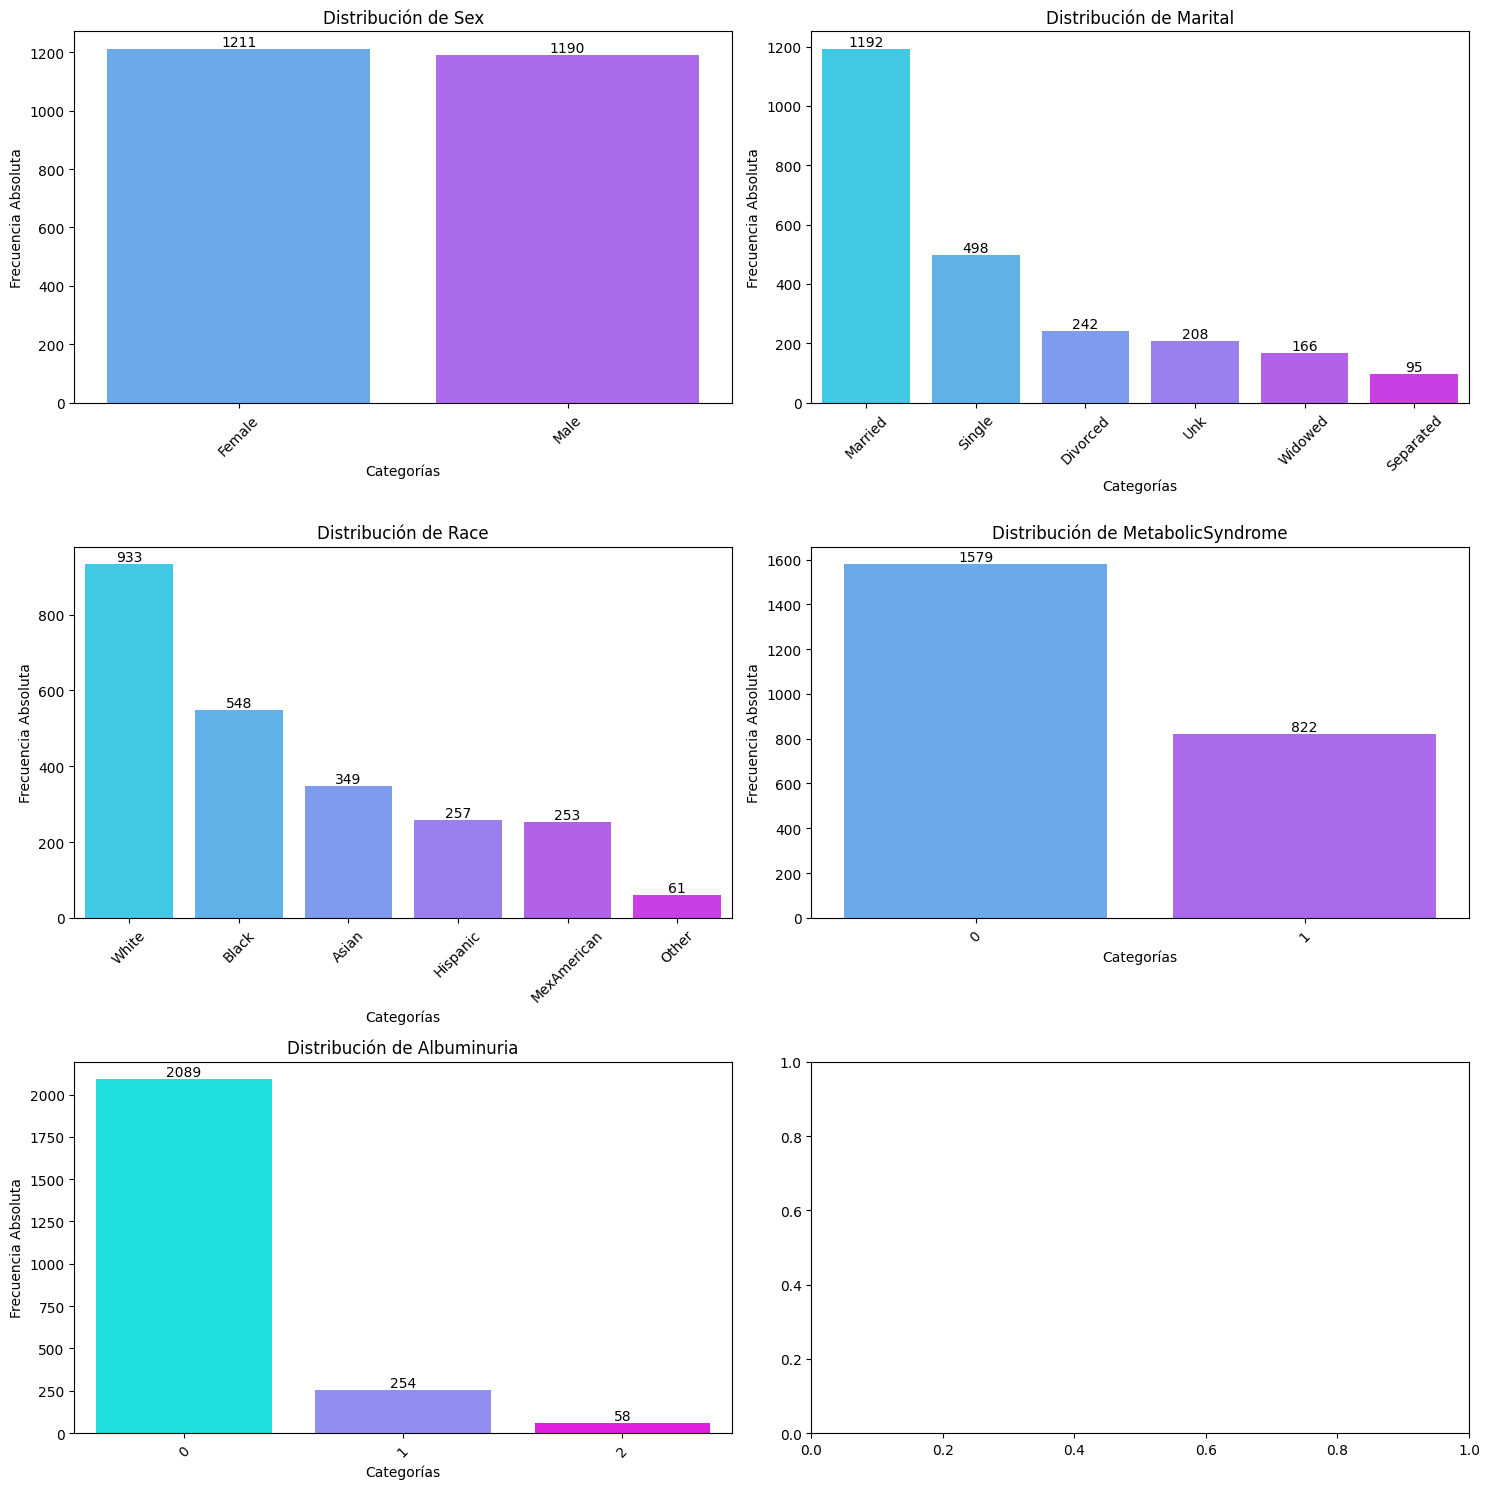

In [8]:
frequencias_absolutas(df_meta, columnas_categoricas)

In [9]:
def frecuencias_relativas(dataframe, columnas_categoricas):
    """
    Función que dado un dataframe y una lista con las columnas categóricas de éste
    pinta los gráficos de frecuencia relativa de cada columna con sus valores anotados 
    """
    num_cols = len(columnas_categoricas)
    num_filas = (num_cols // 2) + (num_cols % 2)
    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 
    for i, col in enumerate(columnas_categoricas):
        ax = axes[i] if num_cols > 1 else axes
        freq = round(dataframe[col].value_counts()/len(dataframe)*100,2)
        barra = sns.barplot(x=freq.index, y=freq, ax=ax, palette='cool', hue = freq.index, legend = False)
        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('Categorías')
        ax.set_ylabel('Frecuencia Relativa')
        ax.tick_params(axis='x', rotation=45)
        for index, value in enumerate(freq):
            barra.text(index, value, str(value), ha='center', va='bottom')

    plt.tight_layout()
    plt.show()

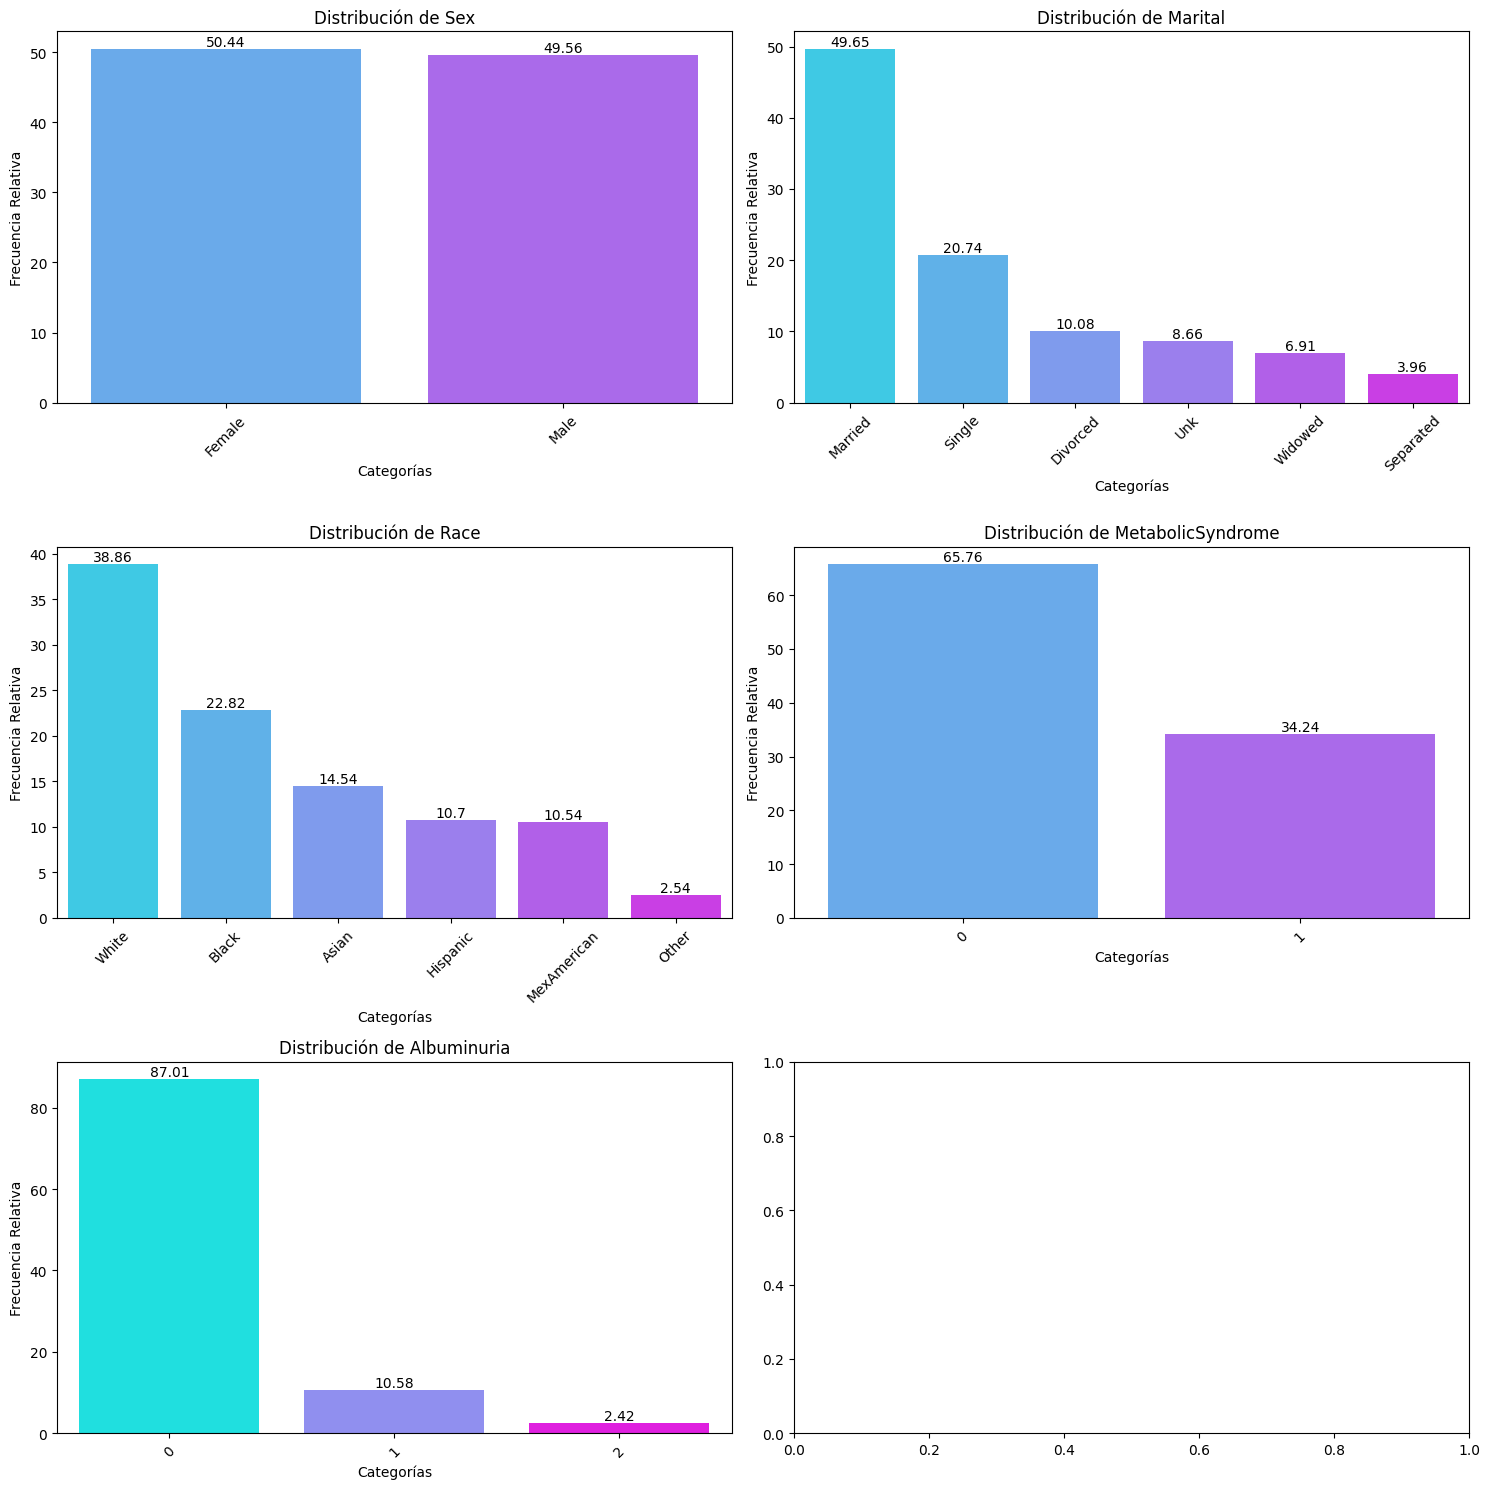

In [10]:
frecuencias_relativas(df_meta, columnas_categoricas)

#### Observaciones:

***Sex***:
- Según estos valores, hay casi la misma cantidad de hombres y mujeres en la población de estudio. Voy a relacionarlo con mi variable objetivo "Síndrome Metabólico" para determinar si se mantiene esta relación equilibrada o si el género influye en la presencia de esta condición.

***Marital***:
- Esta variable muestra la distribución de valores según el estado civil del individuo. Es evidente que la mitad de los individuos (49.65%) están casados, y la otra mitad se distribuye entre solteros (20.74%), divorciados (10.08%) y viudos y separados que no llegan ni al 10% de la población de estudio.

***Race***:
- Casi el 40% de los individuos son blancos; el resto de la población se divide en población afroamericana (22.82%), asiáticos (14.54%) y los valores restantes se dividen entre hispanos, mexicano-americanos y otras razas no descritas.

***MetabolicSyndrome***:
- Esta es nuestra variable principal y, por el momento, podemos afirmar que el 65.76% de los individuos no tenía síndrome metabólico, frente a un 34.24% que sí presenta esta condición. Realizaremos análisis bivariados y multivariados con ella para determinar si la presencia o ausencia de esta condición está relacionada con el sexo, el estado civil y la raza.

***Albuminuria***:

- Esta variable indica que la mayoría de los individuos tenía valores normales de albúmina en la orina y no sufrían daño renal al momento del estudio (87.01%). Aproximadamente el 10% tenía valores moderadamente altos, lo que significa el inicio de enfermedad renal, y el 3% restante ya sufría de daño renal avanzado con valores muy por encima de lo normal.

Finalmente, es necesario realizar un análisis bivariante y multivariante de todas las columnas categóricas con "MetabolicSyndrome" para determinar cómo se correlacionan y cuánto influyen estas variables en la presencia o ausencia de la condición.

### Análisis univariante de las columnas numéricas

In [11]:
df_meta.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2401.0,48.691795,17.632852,20.0,34.00,48.00,63.00,80.000000
Income,2401.0,3810.079134,3007.464054,0.0,1600.00,2500.00,6200.00,9000.000000
WaistCirc,2401.0,98.307254,15.962233,56.2,87.00,97.50,107.20,176.000000
BMI,2401.0,29.455930,9.788887,13.4,24.00,27.80,32.30,98.307254
Albuminuria,2401.0,0.154102,0.422780,0.0,0.00,0.00,0.00,2.000000
UrAlbCr,2401.0,43.626131,258.272829,1.4,4.45,7.07,13.69,5928.000000
UricAcid,2401.0,5.489046,1.439358,1.8,4.50,5.40,6.40,11.300000
BloodGlucose,2401.0,108.247813,34.820657,39.0,92.00,99.00,110.00,382.000000
HDL,2401.0,53.369429,15.185537,14.0,43.00,51.00,62.00,156.000000
Triglycerides,2401.0,128.125364,95.322477,26.0,75.00,103.00,150.00,1562.000000


In [12]:
# Calculamos el IQR de cada variable númerica
def get_IQR(df, lista_columnas):
    iqr = {}
    for columna in lista_columnas:
        iqr[columna] = (df[columna].quantile(0.75) - df[columna].quantile(0.25))
    return iqr

In [13]:
columnas_numericas

['Age',
 'WaistCirc',
 'BMI',
 'UrAlbCr',
 'UricAcid',
 'BloodGlucose',
 'HDL',
 'Triglycerides',
 'Income']

In [14]:
get_IQR(df_meta, columnas_numericas)

{'Age': 29.0,
 'WaistCirc': 20.200000000000003,
 'BMI': 8.299999999999997,
 'UrAlbCr': 9.239999999999998,
 'UricAcid': 1.9000000000000004,
 'BloodGlucose': 18.0,
 'HDL': 19.0,
 'Triglycerides': 75.0,
 'Income': 4600.0}

In [15]:
# Calculamos el coeficiente de varianza de cada columna numércia
def variabilidad(df, columnas_numericas):
    df_var = df[columnas_numericas].describe().loc[["std","mean"]].T
    df_var["CV"] = df_var["std"]/df_var["mean"]
    return df_var

In [16]:
variabilidad(df_meta, columnas_numericas)

,std,mean,CV
Age,17.632852,48.691795,0.362132
WaistCirc,15.962233,98.307254,0.162371
BMI,9.788887,29.455930,0.332323
UrAlbCr,258.272829,43.626131,5.920141
UricAcid,1.439358,5.489046,0.262224
BloodGlucose,34.820657,108.247813,0.321675
HDL,15.185537,53.369429,0.284536
Triglycerides,95.322477,128.125364,0.743978
Income,3007.464054,3810.079134,0.789344


Me llama la atención que casi todas las variables tiene una alta variabilidad, excepto "WaistCirc","UricAcid","HDL", y lo que más llama la atencíon es la altisima variabilidad que tiene "UrAlbCr". Sin duda tendremos outliers que habrá que tratar más adelante. De momento haremos los histogramas con la función de densidad y los diagramas de caja para analizar mejor.

In [17]:
def boxplot_histograma(dataframe, columna):
    """
    Función que dibuja los diagramas de caja e histogramas
    con la densidad categórica de las variables numéricas.
    """ 
    plt.figure(figsize=(8,4))
    plt.subplot(1, 2, 1)
    sns.boxplot(x=dataframe[columna], whis= 3) # Dejamos el whis en 3 para que sea una medida más conservadora y que los valores atípicos sean los más extremos
    plt.title(f'Boxplot de {columna}')

    plt.subplot(1, 2, 2)
    sns.histplot(data=dataframe, x=columna, kde=True)
    plt.title(f'Histograma con densidad categórica de {columna}')

    plt.tight_layout()
    plt.show()

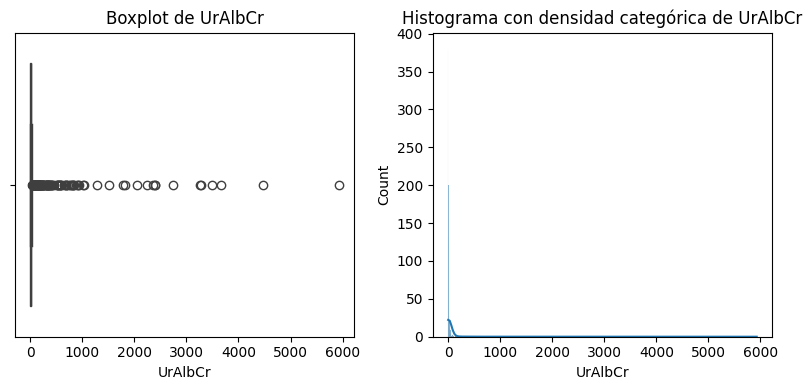

In [18]:
boxplot_histograma(df_meta, "UrAlbCr")

Como ya había visto **la variabilidad de "UrAlbCr" es super ALTA**, vamos a tratarla antes de continuar con el análisis:


Lo más lógico sería aplicarle el logaritmo o tratar de categorizarla, pero como sé que la relación albúmina-creatinina (UrAlbCr) en la orina está estrechamente relacionada con la "Albuminuria" y que ambas pruebas están diseñadas para evaluar la cantidad de albúmina presente en la orina y son utilizadas como indicadores de problemas renales o daño renal.Se que están estrechamente relacionadas en el sentido de que buscan evaluar y medir la cantidad de albúmina en la orina en una muestra de orina de 24 horas:

- *Valor normal*= Menos de 30 miligramos (mg) de albúmina por gramo (g) de creatinina (menos de 30 mg/g de creatinina) en una muestra de orina (tanto en una medición de albúmina en orina aleatoria como en una muestra de orina de 24 horas).
- *Valor moderadamente alto(Microalbuminuria)*=  Entre 30 y 300 mg/g de creatinina. Esto se considera un estado intermedio entre los niveles normales y la albuminuria franca.
- *Valores anormales (Albuminuria franca)* =  Mayor a 300 mg/g de creatinina. Este nivel elevado de albúmina en la orina generalmente se asocia con enfermedad renal o daño renal significativo.
 
Decido comprobar su relación y si es así voy a eliminar la columna de "UrAlbCr" y me quedaré con "Albuminuria" ya que para el presenta EDA me sirve esta columna que ya está categorizada.

In [19]:
def categorizar(valor):
    """
    Función que dado un valor, en este caso "UrAlbCr"
    categoriza los valores
    """

    if valor >= 0 and valor < 30: #Valores normales
        return 0
    elif valor >= 30 and valor <= 300:  #Microalbuminuria
        return 1
    elif valor > 300 and valor <= 10000:   #AlbumiuriaFranca
        return 2
    else:
        return None  # Manejar valores fuera de los rangos especificados según sea necesario


In [20]:
# Crear una nueva columna utilizando la función definida
df_meta["UrAlbCr_Cat"]  = df_meta["UrAlbCr"].apply(categorizar)
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2401 non-null   int64  
 1   Sex                2401 non-null   object 
 2   Marital            2401 non-null   object 
 3   Income             2401 non-null   float64
 4   Race               2401 non-null   object 
 5   WaistCirc          2401 non-null   float64
 6   BMI                2401 non-null   float64
 7   Albuminuria        2401 non-null   int64  
 8   UrAlbCr            2401 non-null   float64
 9   UricAcid           2401 non-null   float64
 10  BloodGlucose       2401 non-null   int64  
 11  HDL                2401 non-null   int64  
 12  Triglycerides      2401 non-null   int64  
 13  MetabolicSyndrome  2401 non-null   int64  
 14  Nulo_marital       2401 non-null   bool   
 15  Nulo_income        2401 non-null   bool   
 16  UrAlbCr_Cat        2401 

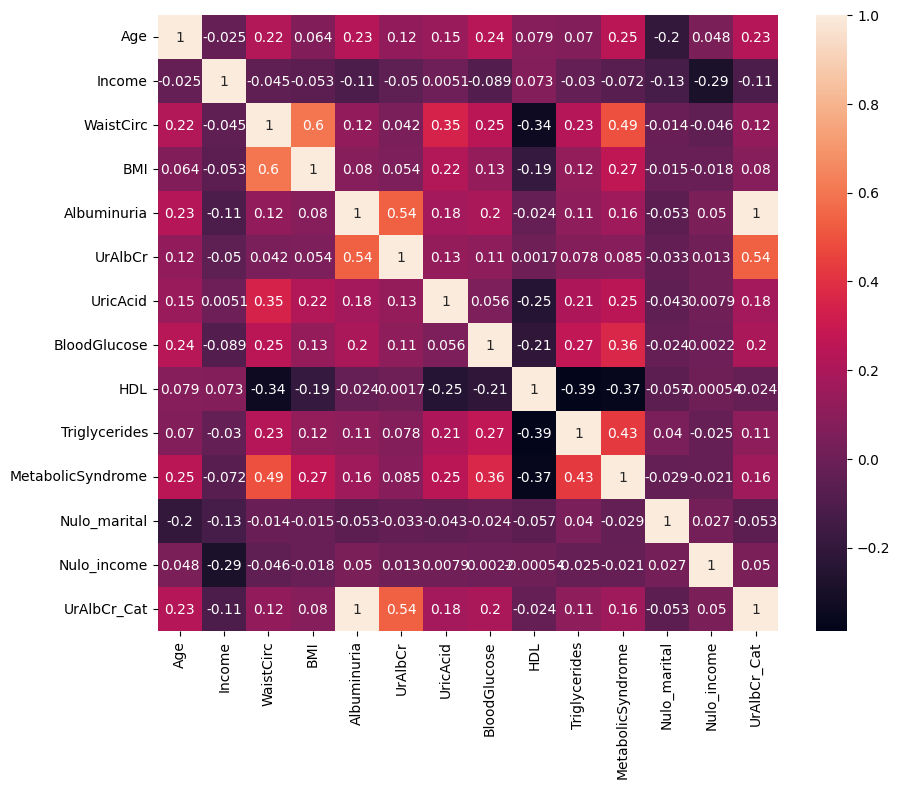

In [21]:
#Hago un mapa de calor para ver como se relacionan "Albumuria" con "UrAlbCr_Cat"
plt.figure(figsize=(10, 8))
sns.heatmap(df_meta.corr(numeric_only=True), annot=True);

<Axes: xlabel='Albuminuria', ylabel='UrAlbCr_Cat'>

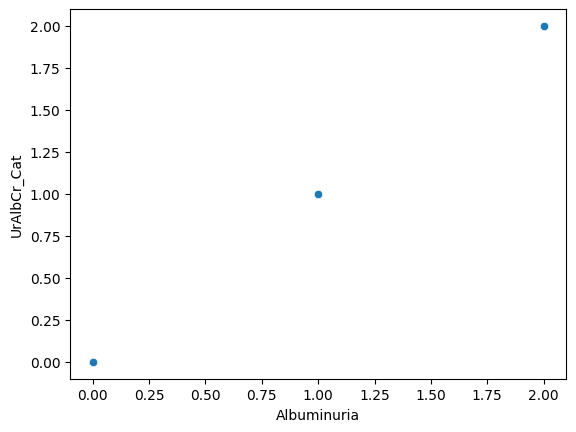

In [22]:
# Hago un scatterplot para corroborar que los puntos de ambas variables se correlacionan
sns.scatterplot(x=df_meta["Albuminuria"], y=df_meta["UrAlbCr_Cat"] )

Hecho estas dos comprobaciones, demostramos que categorizar "UrAlbCr" nos aporta la misma información que la columna "Albuminuria", así que eliminamos "UrAlbCr" del dataset. Seguimos el análisis de las otras variables numéricas.

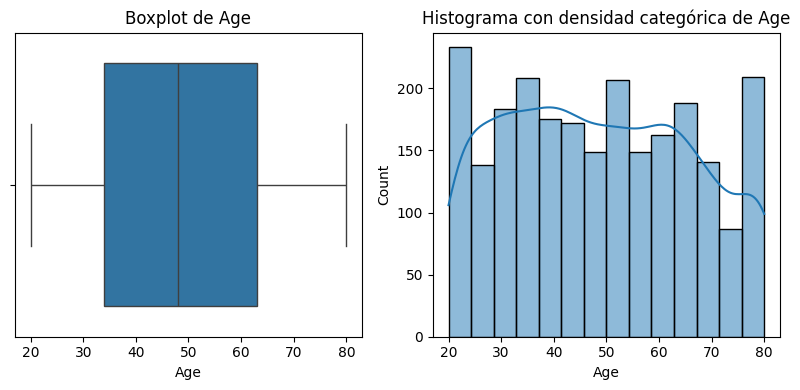

In [23]:
boxplot_histograma(df_meta, "Age")

**"Age"**: Observamos una gráfica muy simetrica, donde la media (48,69) y la mediana (48.00) son casi similares, no hay dispersión ni valores atípicos.

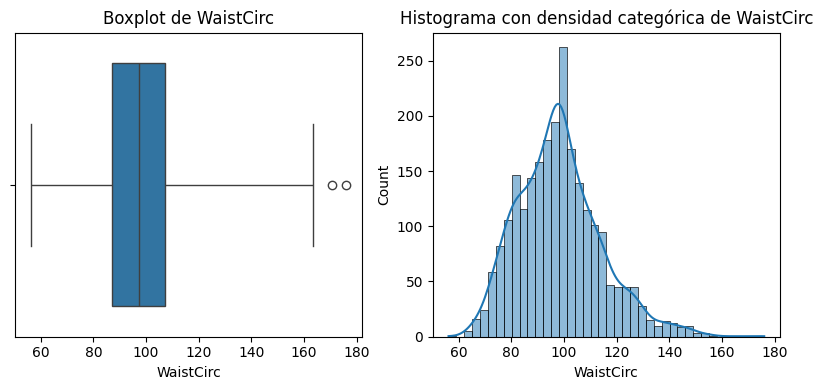

In [24]:
boxplot_histograma(df_meta, "WaistCirc")

**"WaistCirc"**: Se observa una gráfica bastante simétrica, lo que representa bien los valores de tendencia central: la media es 98.30 y la mediana es 97.50. Además, muestra poca dispersión (coeficiente de variación del 16.32%). Se identifican pocos valores atípicos, los cuales están solo por encima del umbral (pacientes con mediciones de circunferencia abdominal que superan los 150 cm). Sería interesante establecer una relación con "BMI", "BloodGlucose", "HDL" y "Triglycerides" para corroborar si en conjunto pueden ser indicativos del síndrome metabólico.

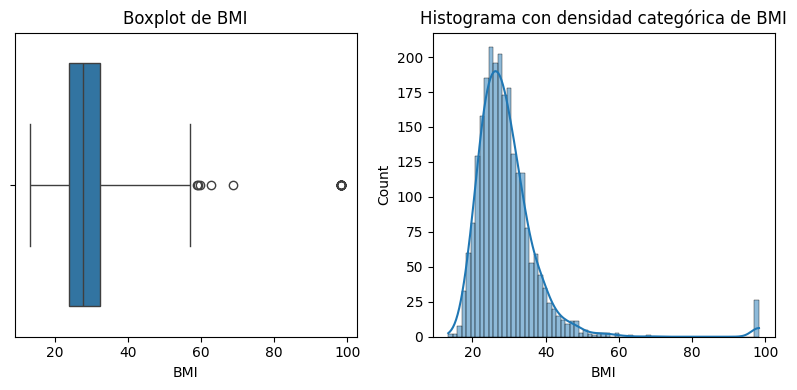

In [25]:
boxplot_histograma(df_meta, "BMI")

**"BMI"**: Se observa una gráfica con una ligera asimetría hacia la derecha, lo que indica una distribución menos simétrica. El coeficiente de variación es aproximadamente del 33%. Las medidas de tendencia central muestran una buena representación: la media es 29.4 y la mediana es 27.8. Se identifican outliers por encima, destacando uno que sobrepasa significativamente los valores de la media. 

Podemos categorizar esta variable basandonos en las clasificaciones de BMI:
- Bajo peso: < 18.5
- Normal: 18.5 – 24.9
- Sobrepeso: 25.0 – 29.9
- Obesidad: > 30.0

¿Se relaciona este outlier con el outlier de "WaistCirc"?

Sería interesante establecer una relación con "WaistCirc", "BloodGlucose", "HDL" y "Triglycerides" para corroborar si en conjunto pueden ser indicativos del síndrome metabólico, ya que son factores de riesgo conocidos para desarrollar esta patología.

***De momento no se trataran los outliers***

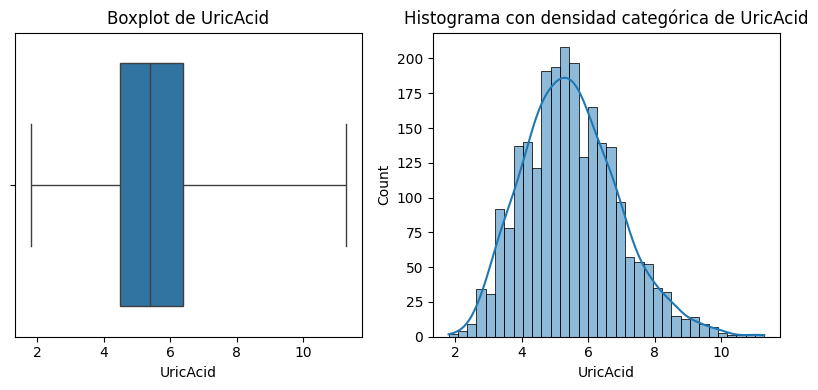

In [26]:
boxplot_histograma(df_meta, "UricAcid")

**UricAcid**: Se aprecia una gráfica completamente simétrica, sin outliers identificables. Las medidas de tendencia central son prácticamente iguales, con una media de 5.48 y una mediana de 5.40. Además, el coeficiente de variación es menor al 30%.

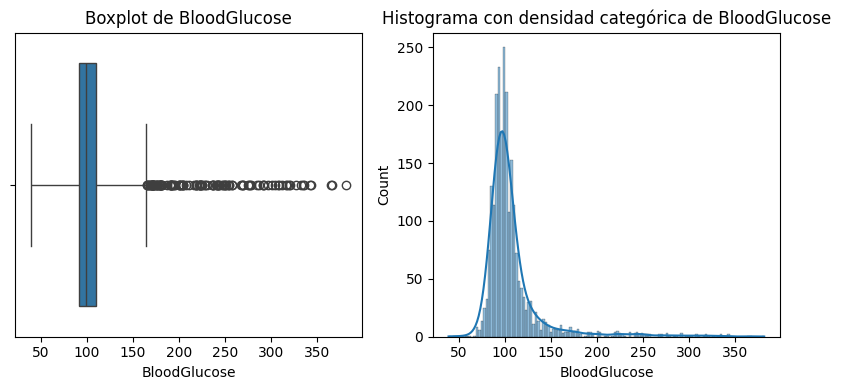

In [27]:
boxplot_histograma(df_meta, "BloodGlucose")

**BloodGlucose**: Se visualiza una gráfica con asimetría hacia la derecha, evidenciando medidas de tendencia central ligeramente distintas; la media es 108.24 y la mediana es 99. Además, se identifica una cola hacia la derecha con outliers que se encuentran notablemente por encima de la media. El coeficiente de variación es superior al 30%, lo que confirma una mayor dispersión de los valores. Esta variable podría categorizarse utilizando los siguientes rangos:
- Nivel normal: < 99 mg/dl en ayunas
- Prediabetes: entre 100 y 125 mg/dl
- Diabetes: > 126 mg/dl

Es relevante preguntarse si los mismos individuos presentan estos valores tan elevados. ¿Existe una relación entre estos valores y los de "BMI" o "WaistCirc"? Además, se plantea la interrogante sobre si estos resultados guardan relación con el síndrome metabólico. Para obtener una comprensión más profunda, será necesario correlacionar todas las variables entre sí.

***De momento no se trataran los outliers***

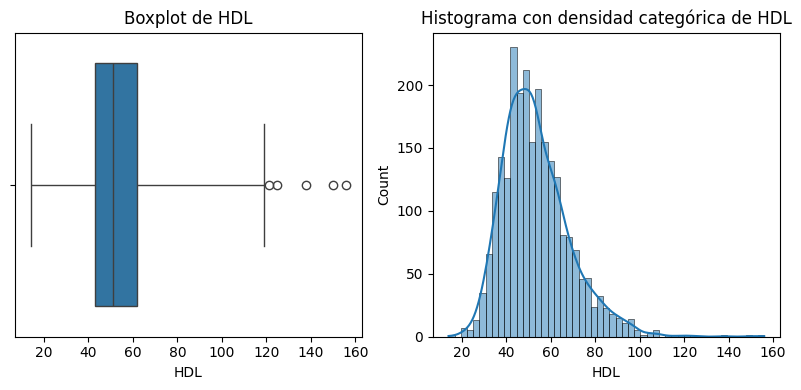

In [28]:
boxplot_histograma(df_meta, "HDL")

**HDL**: Se muestra una gráfica completamente simétrica con pocos outliers. Aquellos que se identifican están por encima de los valores de tendencia central, los cuales son prácticamente idénticos: la media es de 53.36 y la mediana de 51. Además, se observa un coeficiente de variación inferior al 30%, lo que indica una dispersión mínima de los valores en esta variable.


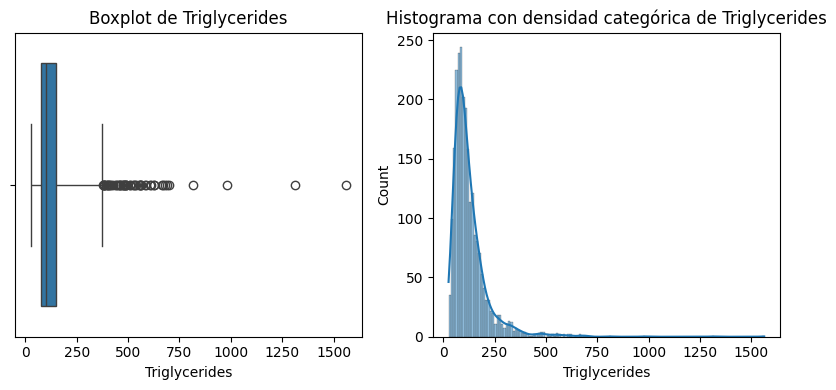

In [29]:
boxplot_histograma(df_meta, "Triglycerides")

**Triglycerides**: La gráfica presenta asimetría hacia la derecha, evidenciando una larga cola y múltiples outliers por encima de la distribución principal. Se nota una alta dispersión de valores, con un coeficiente de variación aproximado del 74%. Las medidas de tendencia central confirman este sesgo hacia la derecha, ya que la media es de 128 y la mediana es de 103. Considerando estos hallazgos, se podría considerar una categorización de la variable de la siguiente manera:
- Nivel normal: < 150 miligramos por decilitro (mg/dl) en adultos; por debajo de 90 mg/dl en niños y adolescentes (de 10 a 19 años)
- Niveles ligeramente altos: Entre 150 y 199 mg/dl
- Niveles altos: Entre 200 y 499 mg/dl

***De momento no se tratarán los outliers***

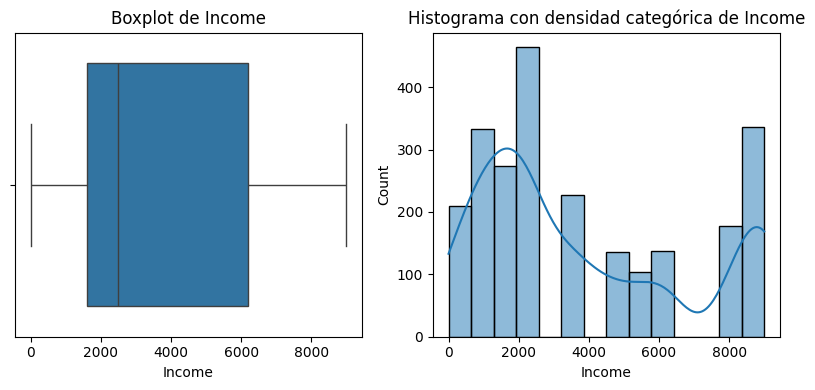

In [30]:
boxplot_histograma(df_meta, "Income")

**Income**:  La gráfica muestra una distribución completamente asimétrica. Los valores de 0 representan datos nulos que se imputaron para preservar la integridad de las otras variables. Es evidente que la distribución no sigue un patrón normal, con una media de 3810 y una mediana de 2500. Además, se observa un coeficiente de variación superior al 70%, indicando una alta variabilidad en los datos.

Antes de pasar al análisis bivariante elimino del dataframe la columna de "UrAlbCr" porque tiene muchos outliers y al categorizarla nos aporta lo mismo que "Albuminuria", y también elimino "UrAlbCr_Cat" ya que se creó con el fin de corroborar lo anteriormente dicho.


In [31]:
df_meta.drop(columns =["UrAlbCr", "UrAlbCr_Cat"], inplace= True)

In [32]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2401 entries, 0 to 2400
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                2401 non-null   int64  
 1   Sex                2401 non-null   object 
 2   Marital            2401 non-null   object 
 3   Income             2401 non-null   float64
 4   Race               2401 non-null   object 
 5   WaistCirc          2401 non-null   float64
 6   BMI                2401 non-null   float64
 7   Albuminuria        2401 non-null   int64  
 8   UricAcid           2401 non-null   float64
 9   BloodGlucose       2401 non-null   int64  
 10  HDL                2401 non-null   int64  
 11  Triglycerides      2401 non-null   int64  
 12  MetabolicSyndrome  2401 non-null   int64  
 13  Nulo_marital       2401 non-null   bool   
 14  Nulo_income        2401 non-null   bool   
dtypes: bool(2), float64(4), int64(6), object(3)
memory usage: 248.7+ KB


### Análisis bivariante de la variable objetivo (MetabolicSyndrome) con las variables categóricas

In [33]:
def barplot_categorica(df, columna_cat):
    """
    Función que crea un gráfico donde se muestra la frecuencia relativa
    de una columna categórica    
    """
    freq = round(df[columna_cat].value_counts()/len(df)*100,2)
    barra = sns.barplot(x=freq.index, y=freq, palette='cool', hue = freq.index, legend = False)
    plt.xlabel("MetabolicSyndrome")
    plt.ylabel("Frecuencia Relativa")
    plt.title("Distribución Sindrome Metabólico")

    for index, value in enumerate(freq):
        barra.text(index, value, str(value), ha='center', va='bottom')

    plt.tight_layout()
plt.show();

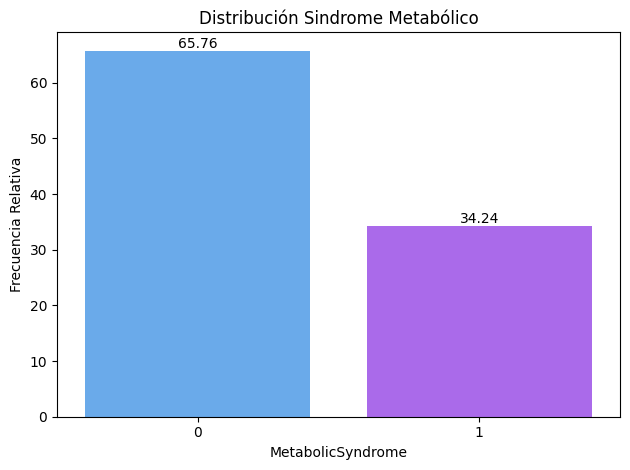

In [34]:
barplot_categorica(df_meta, "MetabolicSyndrome")   

In [35]:
def bivariante_cat(df, cat_col1, cat_col2,  show_values= True):
    """
    Función que crea una gráfica que compara las 
    frecuencias relativas dedos variables categóricas 
    """
    
    count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')
    total_counts = df[cat_col1].value_counts()
    
    
    count_data['count'] = count_data.apply(lambda x: x['count'] / total_counts[x[cat_col1]], axis=1)

    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=cat_col1, y='count', hue=cat_col2, data=count_data, palette= "cool")

    plt.title(f'Relación entre {cat_col1} y {cat_col2}')
    plt.xlabel(cat_col1)
    plt.ylabel('Frecuencia Relativa')

    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height:.2%}', (p.get_x() + p.get_width() / 2., height),
                    ha='center', va='center', fontsize=9, color='black', xytext=(0, 5),
                    textcoords='offset points')

    plt.show()

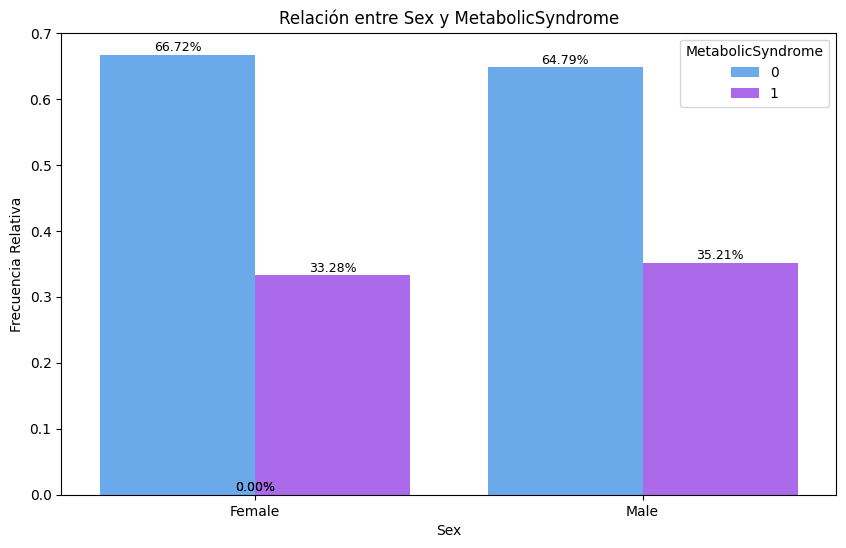

In [36]:
bivariante_cat(df_meta, "Sex", "MetabolicSyndrome")

- No se observa una relación significativa entre el género y la presencia o ausencia del síndrome metabólico en términos relativos.

In [37]:
# Empleamos el test chi2 para corroborar que estadísticamente no existe relación entre Sex y MetabolicSyndrome

tabla_contingencia = pd.crosstab(df_meta["MetabolicSyndrome"],df_meta["Sex"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 0.9108914813100117
P-Value: 0.3398779931081079
Grados de Libertad: 1
Tabla de Frecuencias Esperadas:
 [[796.40524781 782.59475219]
 [414.59475219 407.40524781]]


- P-Value de 0,339 nos confirma no existe relación entre ambas variables

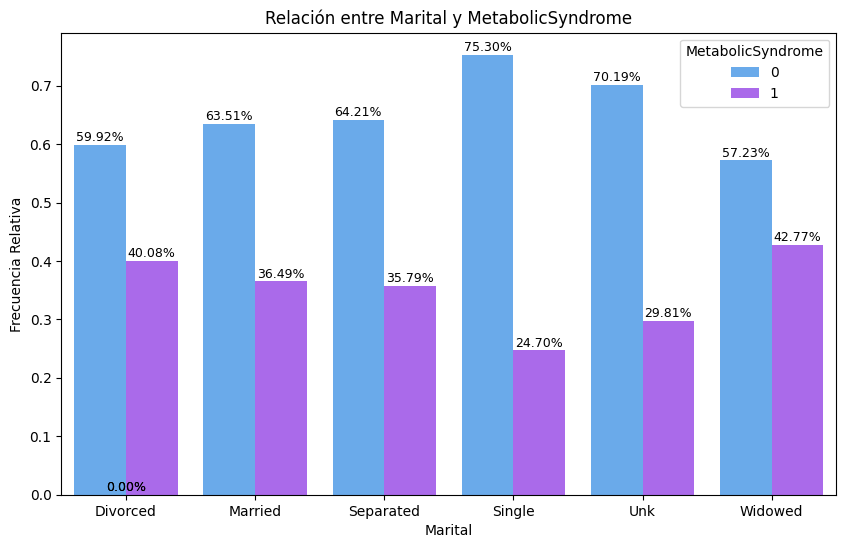

In [38]:
bivariante_cat(df_meta, "Marital", "MetabolicSyndrome")

- Se observa que el estado civil parece influir en la presencia o ausencia del Síndrome Metabólico, especialmente en el caso de los viudos, donde se observa una mayor proporción de personas viudas con Síndrome Metabólico en comparación con los que no lo padecen. Por otro lado, ocurre lo contrario con los solteros. Sin embargo, surge la pregunta: ¿Esto está relacionado con el estado civil o con la edad? Será necesario realizar un análisis multivariante considerando estos tres aspectos para poder comprenderlo mejor.

In [39]:
# Empleamos el test chi2 para corroborar que estadísticamente existe relación entre Marital y MetabolicSyndrome

tabla_contingencia = pd.crosstab(df_meta["MetabolicSyndrome"],df_meta["Marital"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 33.77502543567307
P-Value: 2.639582032407282e-06
Grados de Libertad: 5
Tabla de Frecuencias Esperadas:
 [[159.14952103 783.91003748  62.47605165 327.50603915 136.78967097
  109.16867972]
 [ 82.85047897 408.08996252  32.52394835 170.49396085  71.21032903
   56.83132028]]


- Rechazamos la hipótesis nula de no dependencia y consideramos que sí existe una relación entre el estado civil y la presencia o ausencia del síndrome metabólico. Sin embargo, es necesario continuar investigando, ya que parece estar más relacionado con la edad que con el estado civil.

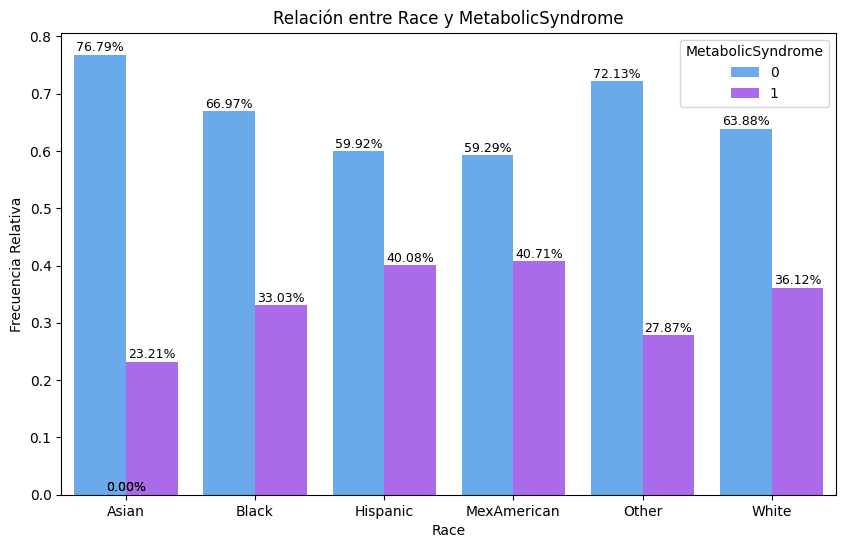

In [40]:
bivariante_cat(df_meta, "Race", "MetabolicSyndrome")

- Se observa que tanto en personas de raza negra como en blancos, se mantiene una tendencia del 65% aproximadamente de no tener Síndrome Metabólico y un 33% aproximado para aquellos que sí lo padecen. Por otro lado, en razas como la hispana o la mexico-americana, parece haber un ligero aumento tanto en quienes no sufren esta condición como en aquellos que sí la tienen. Sin embargo, en pacientes de origen asiático, parece haber una menor incidencia de esta condición.

- La gráfica sugiere que la raza parece ser un factor que influye en la presencia o ausencia del Síndrome Metabólico, pero considero que podría estar más relacionado con el índice de masa corporal o la circunferencia de la cintura (WaistCirc) que específicamente con la raza.

In [41]:
# Empleamos el test chi2 para corroborar que estadísticamente existe relación entre Race y MetabolicSyndrome

tabla_contingencia = pd.crosstab(df_meta["MetabolicSyndrome"],df_meta["Race"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 30.37876529143362
P-Value: 1.2420912078884288e-05
Grados de Libertad: 5
Tabla de Frecuencias Esperadas:
 [[229.51728446 360.3881716  169.01416077 166.38359017  40.11620158
  613.58059142]
 [119.48271554 187.6118284   87.98583923  86.61640983  20.88379842
  319.41940858]]


-Estadísticamente, parece haber una relación entre estas dos variables. Sin embargo, tendríamos que estudiar más a fondo si es realmente por la raza o si hay más factores relacionados.

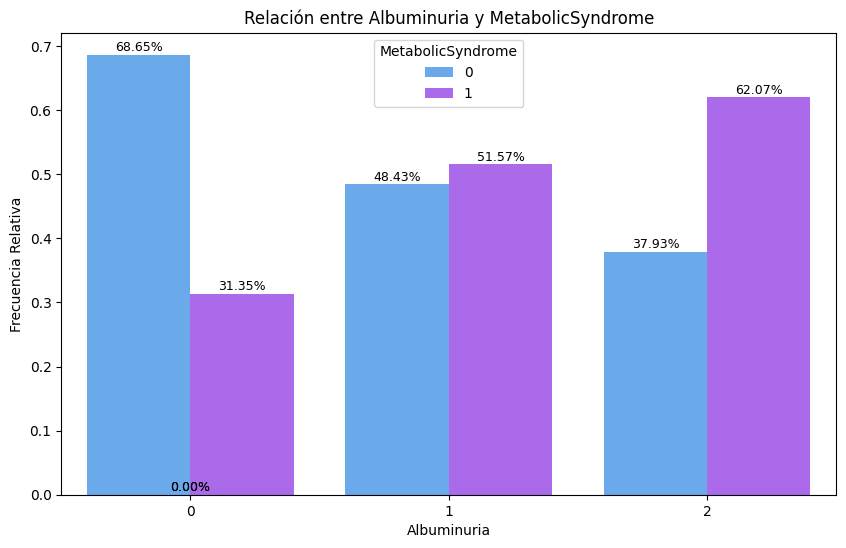

In [42]:
bivariante_cat(df_meta, "Albuminuria", "MetabolicSyndrome")

-En esta gráfica se evidencia la alta correlación entre ambas variables. Los pacientes que tienen valores altos de albúmina en orina son, en su mayoría, pacientes diagnosticados con síndrome metabólico. Es necesario realizar un análisis multivariante de los factores de riesgo de esta enfermedad con la variable albuminuria, ya que al observar esta relación podríamos establecer que padecer esta enfermedad puede llevar a un daño renal severo. Aunque no es objeto de estudio del presente EDA, sería interesante estudiar qué tan relacionado está el síndrome metabólico con la enfermedad renal severa.

In [43]:
# Empleamos el test chi2 para corroborar que estadísticamente existe relación entre Albuminuria y MetabolicSyndrome

tabla_contingencia = pd.crosstab(df_meta["MetabolicSyndrome"],df_meta["Race"])

chi2, p, dof, expected = chi2_contingency(tabla_contingencia)


print("Valor Chi-Cuadrado:", chi2)
print("P-Value:", p)
print("Grados de Libertad:", dof)
print("Tabla de Frecuencias Esperadas:\n", expected)

Valor Chi-Cuadrado: 30.37876529143362
P-Value: 1.2420912078884288e-05
Grados de Libertad: 5
Tabla de Frecuencias Esperadas:
 [[229.51728446 360.3881716  169.01416077 166.38359017  40.11620158
  613.58059142]
 [119.48271554 187.6118284   87.98583923  86.61640983  20.88379842
  319.41940858]]


- Confirmamos ésta estrecha relación entre ambas variables

### Pasamos al análisis bivariante entre nuestra variable objetivo "MetabolicSyndrome" y las variables númericas

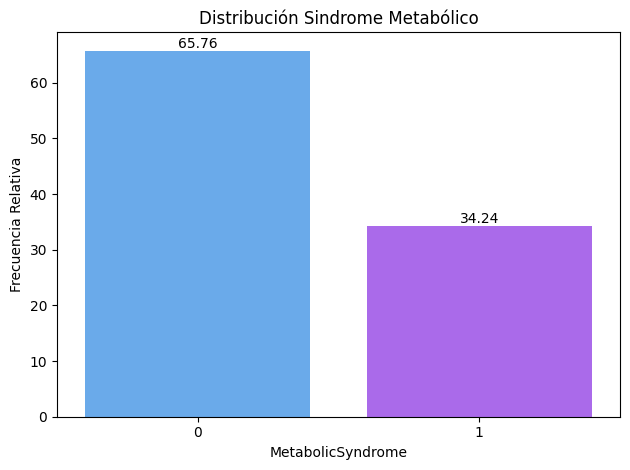

In [44]:
barplot_categorica(df_meta, "MetabolicSyndrome")   

In [45]:
def bivariante_num(df, columna_num, columna_cat):
    """
    Función para realizar un diagrama de caja para el análisis bivariante entre una columna numérica y la variable objetivo binaria.

    """
    plt.figure(figsize=(8,5))
    sns.boxplot(hue = columna_cat, y = columna_num, data=df, whis = 3, palette= "cool")
    plt.title(f'Análisis Bivariante entre  {columna_num} y {columna_cat}')
    plt.xlabel(columna_cat)
    plt.ylabel (columna_num)
    plt.show()

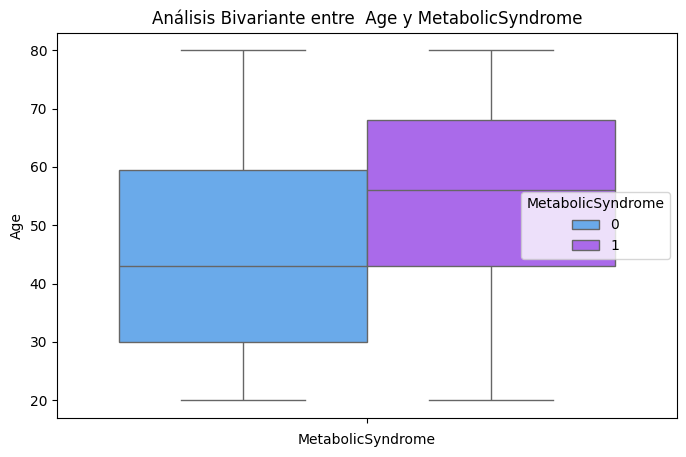

In [46]:
bivariante_num(df_meta, "Age", "MetabolicSyndrome")

In [47]:
def histograma_bivariante(df, columna_num, columna_cat):
    """
    Función que pinta los histogramas de una variable numérica y una varible categórica 
    para realizar un análisis bivariante
    """
    plt.figure(figsize=(6, 4))
    sns.histplot(data = df, x= columna_num, hue = columna_cat, kde = True, palette= "cool")
    

    plt.title(f'Análisis Bivariante entre {columna_num} y {columna_cat}')
    plt.xlabel(columna_num)
    plt.show()

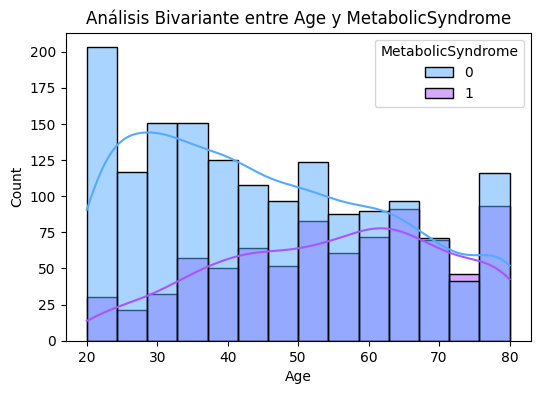

In [48]:
histograma_bivariante(df_meta, "Age", "MetabolicSyndrome")

In [49]:
# Hacemos la Prueba U de Mann-Whitney para corroborar relación o no

grupo_a = df_meta.loc[df_meta["MetabolicSyndrome"] == 0]["Age"]
grupo_b = df_meta.loc[df_meta["MetabolicSyndrome"] == 1]["Age"]


u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 449338.0
Valor p: 3.0426071534153445e-35


- El valor p obtenido, que es extremadamente pequeño (3.04e-35), indica que hay una fuerte evidencia para rechazar la hipótesis nula. Por ende, podemos concluir que hay una diferencia significativa en las edades entre los dos grupos en términos de su asociación con el síndrome metabólico

- Sin embargo, aunque este resultado sugiere una asociación estadísticamente significativa entre la edad y la presencia de síndrome metabólico en los datos analizados, debemos recordar que la significancia estadística no implica necesariamente causalidad.

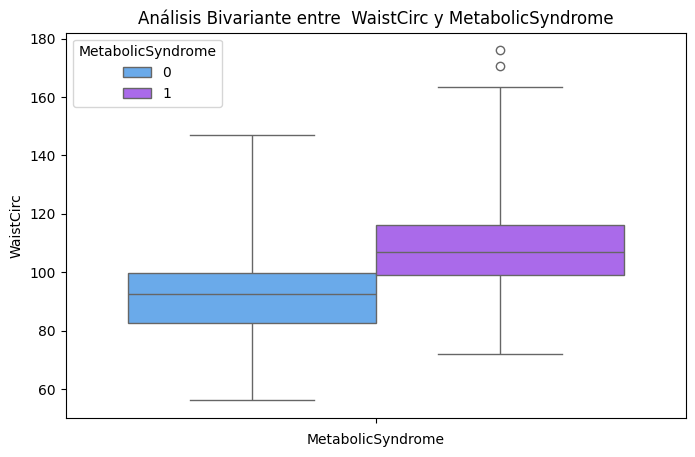

In [50]:
bivariante_num(df_meta, "WaistCirc", "MetabolicSyndrome")

- Hay diferencias significativas en las medianas de cada grupo
- No hay outliers en el grupo que no tiene sindrome metabólico

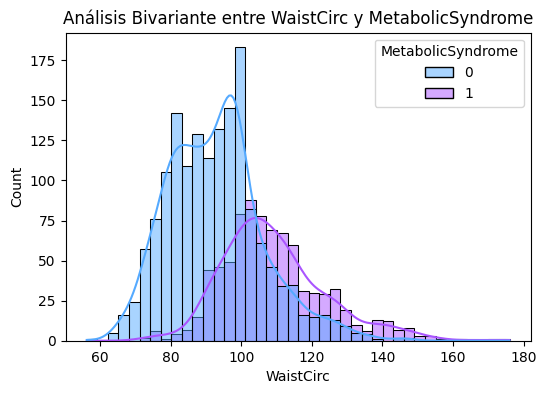

In [51]:
histograma_bivariante(df_meta, "WaistCirc", "MetabolicSyndrome")

- Hay una mayor concentración de pacientes sin sindrome metabólico y la gran mayoría de éstos pacientes tienen un circunferencia abdominal menor de 100 cm, mientras los pacientes que si padecen la enfermedad tiene medidas que se concentran en los 90 y los 160 cm de diametro.
- La distribución de los pacientes con sindrome metabólico parece normal mientras que la de los pacientes que son sanos es bimodal.
- Los pacientes que tiene una circuferencia abdominal entre 90 y 130 cm pueden pertenecer a ambos grupos, no hay un umbral claro de circunferencia abdominal que separe de manera definitiva ambos grupos. Ésto indica que la circunferencia abdominal por si sola no es un marcador definitivo del sindrome.
- Ésta distribución es la esperada, porque conocemos que para diagnosticar a un paciente con sindrome metabolico uno de los criterios a cumplir es: circunferencia abdominal ≥ 88 cm para las mujeres y ≥ 102 cm en hombres, pero existen otros factores de riesgo como lo son la azúcar en sangre, niveles altos de trigliceridos, sobrepeso y niveles bajos de HDL. Por lo que sería interesante realizar análisis multivariante con éstas columnas.



In [52]:
# Podemos observar que influye la medida de la circunferencia abdominal en tener o sindrome metábolico, vamos a hacer
# la Prueba U de Mann-Whitney para corroborar dicha relación

grupo_a = df_meta.loc[df_meta["MetabolicSyndrome"] == 0]["WaistCirc"]
grupo_b = df_meta.loc[df_meta["MetabolicSyndrome"] == 1]["WaistCirc"]


u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 249732.5
Valor p: 1.909466765012404e-135


- Los resultados indican que hay una diferencia estadísticamente significativa entre las circunferencias de la cintura de los dos grupos. El P-Value es mucho más pequeño que los niveles de significancia convencionales (0.05). Por lo tanto, se rechazaría la hipótesis nula de que no hay diferencia en la circunferencia de la cintura entre los dos grupos.

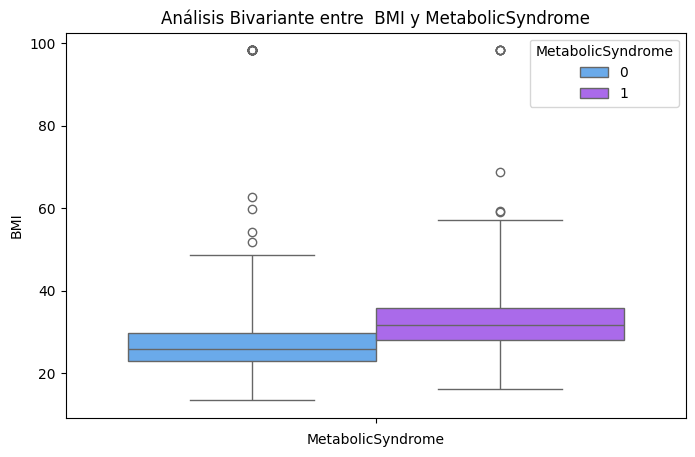

In [53]:
bivariante_num(df_meta, "BMI", "MetabolicSyndrome")

- Hay diferencias significativas en las medianas de cada grupo.
- Hay outliers en ambos grupos, llama la atención un valor muy alto que esta muy por encima de los valores medios, y aún más llamativo es que este en ambos grupos.

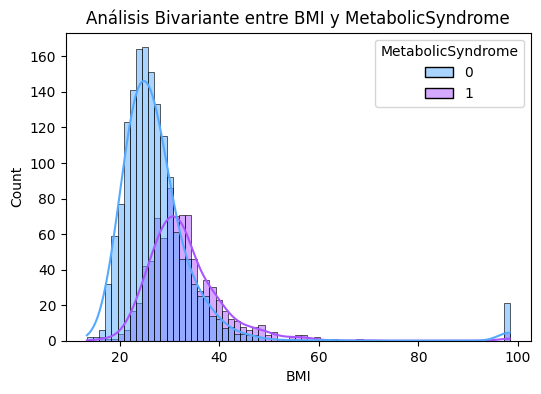

In [54]:
histograma_bivariante(df_meta, "BMI", "MetabolicSyndrome")

- Observamos que en ambos grupos de pacientes parecen tener una distrubución muy normal, salvo por ese valor a la derecha tan alto.
- Hay mayor concentración de pacientes sanos que con sindrome metabolico.
- Igual que pasa con "WaistCirc" no hay un umbral claro que separe ambos grupos, hay pacientes con peso normal que tienen sindrome metabólico y pacientes obesos sin sindrome metabolico, lo que nos vuelve a indicar que hay más factores implicados en el diagnóstico de la patología.

In [55]:
# Hacemos la Prueba U de Mann-Whitney

grupo_a = df_meta.loc[df_meta["MetabolicSyndrome"] == 0]["BMI"]
grupo_b = df_meta.loc[df_meta["MetabolicSyndrome"] == 1]["BMI"]


u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 299479.0
Valor p: 2.972228195155827e-104


- El P-Value tan bajo que hemos obtenido, nos corrobora que  se rechazaría la hipótesis nula de no hay diferencia en el Índice de Masa Corporal entre los dos grupos basados en la presencia o ausencia del Síndrome Metabólico.

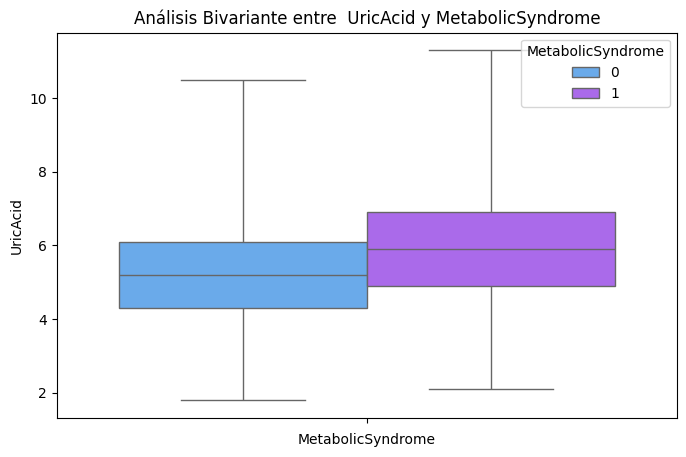

In [56]:
bivariante_num(df_meta, "UricAcid", "MetabolicSyndrome")

-  Hay diferencias entre las medianas de ambos grupos, los pacientes que no tienen sindrome metabolico tiene niveles más bajo de acido úrico.

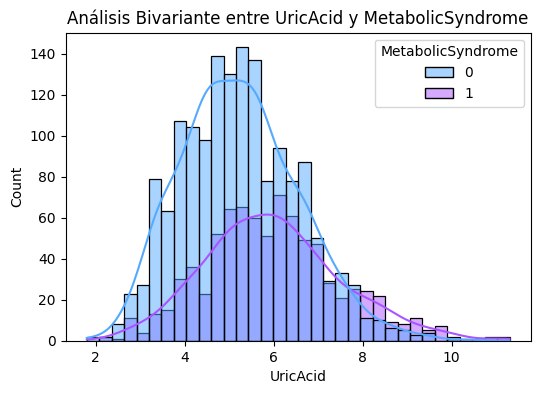

In [57]:
histograma_bivariante(df_meta, "UricAcid", "MetabolicSyndrome")

- Ambos grupos presentan una distribución bastante normal de sus valores.
- La mayor concentración de valores para el grupo que no tiene sindrome metabolico se ubica en valores normales de ácido úrico, mientras que los pacientes que padecen la enfermedad se concentran en valores más altos.
- Los grupos se superponen en un rango específico lo que puede indicar que, aunque haya diferencias en la presencia o ausencia del síndrome metabólico, los niveles de ácido úrico pueden tener una distribución similar para ambos grupos en esa franja de valores.
- Se aprecia que aunque el ácido úrico no es un factor de riesgo para desarrollar la enfermedad actualmente, parece ser un valor interesante estudiar porque la hiperuricemia puede ser una complicación relacionada con el propio Síndrome Metabólico.

In [58]:
# Hacemos la Prueba U de Mann-Whitney

grupo_a = df_meta.loc[df_meta["MetabolicSyndrome"] == 0]["UricAcid"]
grupo_b = df_meta.loc[df_meta["MetabolicSyndrome"] == 1]["UricAcid"]


u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 463353.0
Valor p: 1.064695545748377e-30


- Los valor obtenido sugiere que hay diferencias significativas en los niveles de ácido úrico entre los dos grupos de pacientes (con y sin síndrome metabólico). La magnitud del valor p tan pequeño indica una alta probabilidad de que estas diferencias no sean debidas al azar.

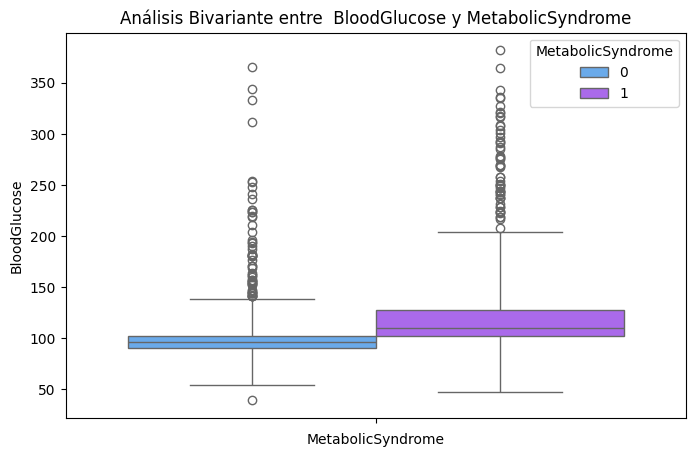

In [59]:
bivariante_num(df_meta, "BloodGlucose", "MetabolicSyndrome")

- Se observan gran cantidad de ouliers en ambos grupos.
- Hay diferencias significativas entre las medianas de ambos grupos.
- Hay mayor concentración de pacientes con niveles altos de azúcar en sangre que tiene tienen sindrome metábolico

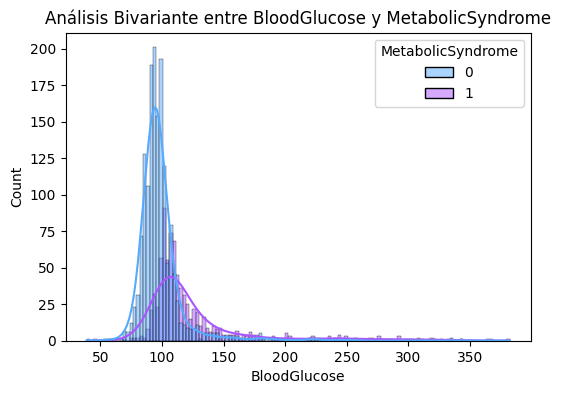

In [60]:
histograma_bivariante(df_meta, "BloodGlucose", "MetabolicSyndrome")

- Se observa que los pacientes sanos están muy concentrados en valores bajos de azúcar en sangre, mientras que los pacientes con sindrome metábolico se concentran más en los valores más altos.
- Ambos grupos tiene una distribución muy normal, es interesante observar que ambos grupos tiene outliers hacía la derecha donde se puede ver que hay pacientes con niveles muy altos de azúcar que tienen o no sindrome metabólico.
- Ambos grupos tienen una superposición en los valores normales de glucosa en sangre, ésto podría significar que, dentro del rango normal de glucosa, no hay una distinción clara entre los dos grupos. Es decir, los valores normales de glucosa en sangre no parecen diferenciar significativamente a los individuos con y sin síndrome metabólico.
- Una vez más corroboramos que el Sindrome Metabólico es una enfermedad multifactorial.

In [61]:
# Hacemos la Prueba U de Mann-Whitney

grupo_a = df_meta.loc[df_meta["MetabolicSyndrome"] == 0]["BloodGlucose"]
grupo_b = df_meta.loc[df_meta["MetabolicSyndrome"] == 1]["BloodGlucose"]


u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 235207.5
Valor p: 2.0667975040751028e-145


- Este resultado indica que los niveles de glucosa en sangre están significativamente asociados con la presencia o ausencia de síndrome metabólico en la muestra analizada.

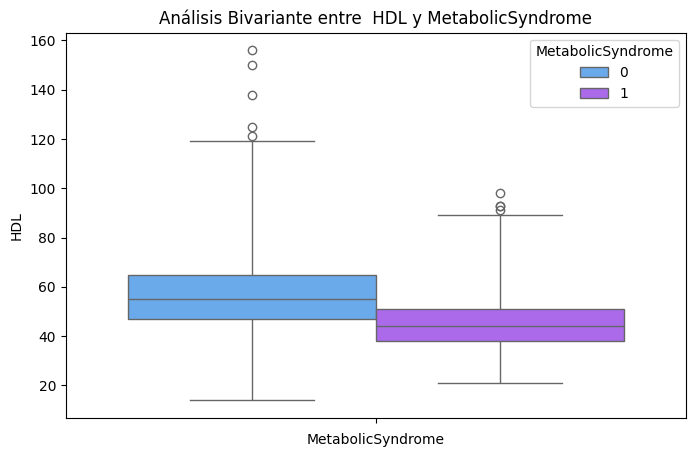

In [62]:
bivariante_num(df_meta, "HDL", "MetabolicSyndrome")

- Las medianas no coincidan, lo que respalda la idea de que hay una diferencia en la distribución de los niveles de HDL entre los dos grupos. Esto puede indicar una asociación entre los niveles de HDL y la presencia o ausencia del síndrome metabólico.
- No hay valores atípicos en ninguno de los grupos.
- Los pacientes que no tienen sindrome metabólico parecen tener niveles de colesterol "bueno" mucho más altos que los pacientes que si tienen sindrome metábolico, los cuales se concentran en valores más bajos de HDL.

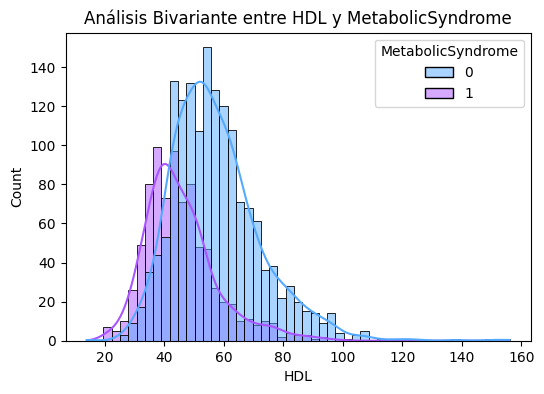

In [63]:
histograma_bivariante(df_meta, "HDL", "MetabolicSyndrome")

- Las distribuciones de ambos grupos parecen ser bastante normales.
- A pesar de que hay diferencias en las medianas y la posición de las cajas en el diagrama de caja, el histograma muestra que las distribuciones de los niveles de HDL para los pacientes con y sin síndrome metabólico se superponen en algunas áreas o rangos de valores.
- Esta superposición puede indicar que hay una región o un rango de valores de HDL(coincide con los valores normales) donde no hay una clara distinción entre los dos grupos. Es posible que, dentro de esta zona, los niveles de HDL no sean lo suficientemente distintivos para diferenciar de manera efectiva a los pacientes con síndrome metabólico de aquellos sin esta condición.
- Corroboramos nuevamente que una sola prueba médica no es suficiente para poder hacer el diagnóstico del sindrome metabólico.

In [64]:
# Hacemos la Prueba U de Mann-Whitney

grupo_a = df_meta.loc[df_meta["MetabolicSyndrome"] == 0]["HDL"]
grupo_b = df_meta.loc[df_meta["MetabolicSyndrome"] == 1]["HDL"]


u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 975197.5
Valor p: 3.930307725255548e-91


- El valor tan bajo del p-valor sugiere una alta certeza de que estas diferencias no son aleatorias y respaldan la hipótesis de que los niveles de HDL están asociados de manera significativa con la presencia o ausencia del síndrome metabólico en la muestra analizada.

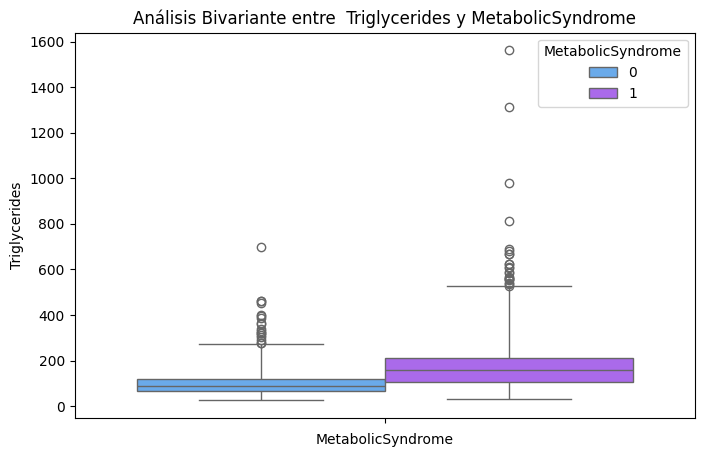

In [65]:
bivariante_num(df_meta, "Triglycerides", "MetabolicSyndrome")

- Observamos nuevamente que las medianas no coinciden y que se diferencian claramente dos grupos, donde los valores más altos de trigliceridos los tienen los pacientes diagnosticados con Sindrome metabólico.

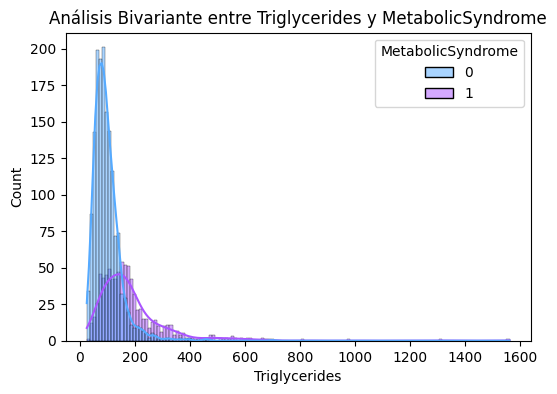

In [66]:
histograma_bivariante(df_meta, "Triglycerides", "MetabolicSyndrome")

- Nos pasa igual que con las variables anteriores, los pacientes sanos se agrupan en valores bajos de trigliceridos, en valores medios se superponen ambos grupos y los pacientes con diagnosticados con sindrome metabólico se concentran en valores más altos, sin embargo llama la atención que hay pacientes sanos con valores bastante altos.
- Tenemos más que claro que los niveles de trigliceridos influyen directamnte en la presencia o no de sindrome metabólico pero no es un factor único determinante. No por tener trigliceridos altos vas a tener sindrome metabólico.

In [67]:
# Hacemos la Prueba U de Mann-Whitney

grupo_a = df_meta.loc[df_meta["MetabolicSyndrome"] == 0]["Triglycerides"]
grupo_b = df_meta.loc[df_meta["MetabolicSyndrome"] == 1]["Triglycerides"]


u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 268867.5
Valor p: 5.85354378654075e-123


- El p-valor tan bajo nos rechaza la hipotesis nula y corroboramos que hay correlación estadística. 

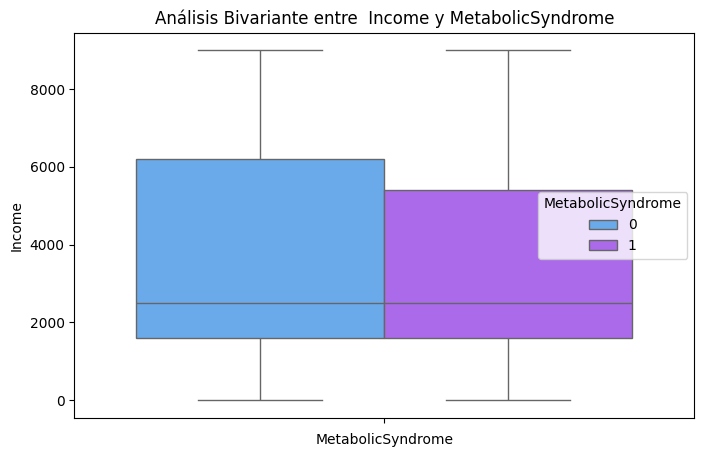

In [68]:
bivariante_num(df_meta, "Income", "MetabolicSyndrome")

- Las medianas son iguales para los dos grupos de pacientes y están inclinadas hacia abajo, podría indicar que, en general, no hay una diferencia sustancial en el ingreso entre los grupos de pacientes con y sin síndrome metabólico
- No hay ouliers en ningún grupo.
- La asimetría en las cajas del boxplot puede sugerir que la distribución de los ingresos no es simétrica para ninguno de los grupos. Esto podría indicar la presencia de sesgos o distribuciones no normales en los datos de ingresos.

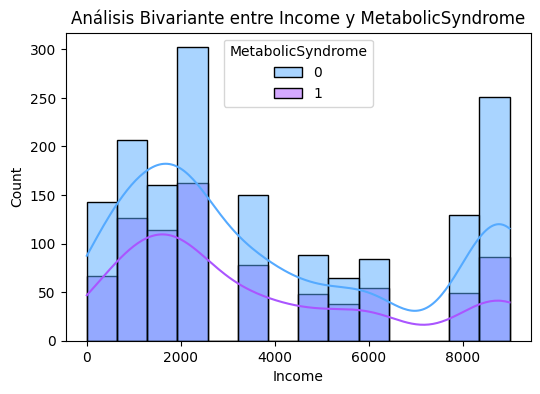

In [69]:
histograma_bivariante(df_meta, "Income", "MetabolicSyndrome")

- Podríamos interpretar que pacientes con ingresos bajos y medios tienen practicamente la misma posibilidad de desarrollar sindrome metabólico o no, sin embargo en el caso de los pacientes con rentas mayores parece que si hay una diferencia significativa. Esto puede indicar que hay factores socioeconómicos relacionados con la prevalencia del síndrome metabólico. 

In [70]:
# Hacemos la Prueba U de Mann-Whitney

grupo_a = df_meta.loc[df_meta["MetabolicSyndrome"] == 0]["Income"]
grupo_b = df_meta.loc[df_meta["MetabolicSyndrome"] == 1]["Income"]


u_stat, p_valor = mannwhitneyu(grupo_a, grupo_b)

print("Estadístico U:", u_stat)
print("Valor p:", p_valor)

Estadístico U: 697349.5
Valor p: 0.0025837497790414834


- Un P-Value de 0.002 en la prueba de Mann-Whitney, sugiere que hay una diferencia estadísticamente significativa entre las distribuciones de ingresos de los dos grupos comparados (personas con y sin síndrome metabólico). Un valor de p tan bajo indica que es muy improbable que estas diferencias sean resultado del azar; por lo tanto, se puede inferir que el ingreso podría estar asociado de alguna manera con la presencia del síndrome metabólico en la población estudiada.

### Hacemos el análisis multivariante

In [71]:
def histogramas_multivariante(df, cat_col, num_col, group_size, bins = "auto"):
    unique_cats = df[cat_col].unique()
    num_cats = len(unique_cats)

    for i in range(0, num_cats, group_size):
        subset_cats = unique_cats[i:i+group_size]
        subset_df = df[df[cat_col].isin(subset_cats)]
        
        plt.figure(figsize=(10, 6))
        for cat in subset_cats:
            sns.histplot(subset_df[subset_df[cat_col] == cat][num_col], kde=True, label=str(cat), bins = bins)
        
        
        plt.title(f'Histograms of {num_col} for {cat_col} (Group {i//group_size + 1})')
        plt.xlabel(num_col)
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()

In [72]:
def trivariant_analysis(df, directora, cat2, num1, group_size = 3, bins = "auto"):
    col_directora = directora
    col_1 = cat2
    col_2 = num1
    diccionario_multivariante = {}
    for valor in df[col_directora].unique():
        diccionario_multivariante[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]] 

    for valor,df_datos in diccionario_multivariante.items():
        print(f"Respuesta {valor}:")
        histogramas_multivariante(df_datos,col_1,col_2, group_size= group_size, bins = bins)

- Hacemos el multivariante entre el sexo, sindrome metabólico y los factores de riesgo

Respuesta Male:


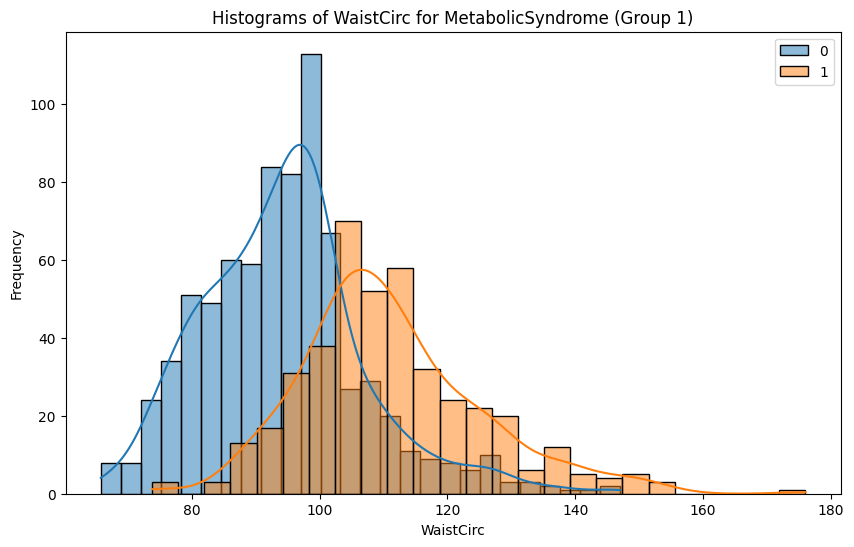

Respuesta Female:


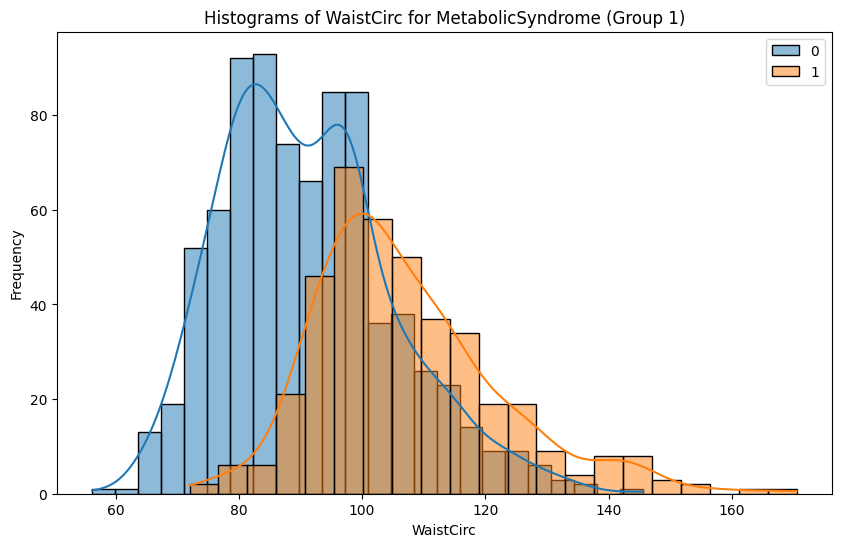

In [73]:
trivariant_analysis(df_meta, "Sex", "MetabolicSyndrome", "WaistCirc", group_size = 3, bins = "auto")

Respuesta Male:


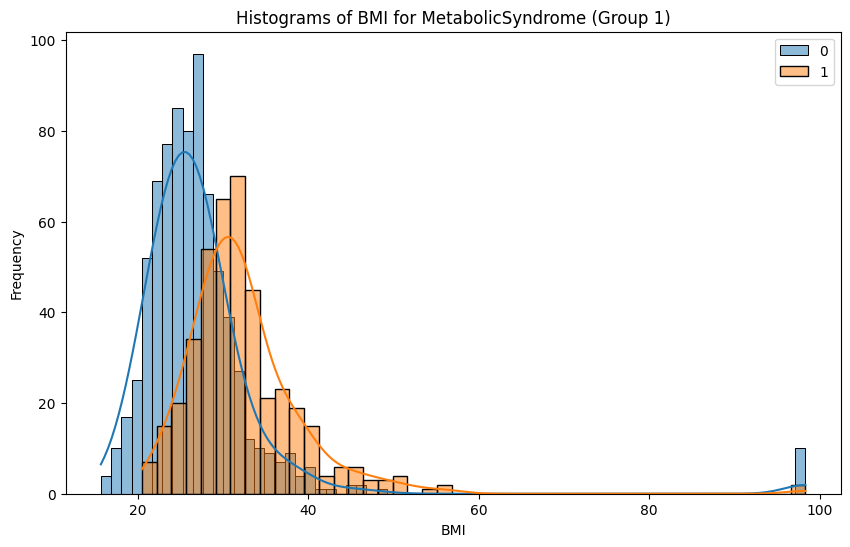

Respuesta Female:


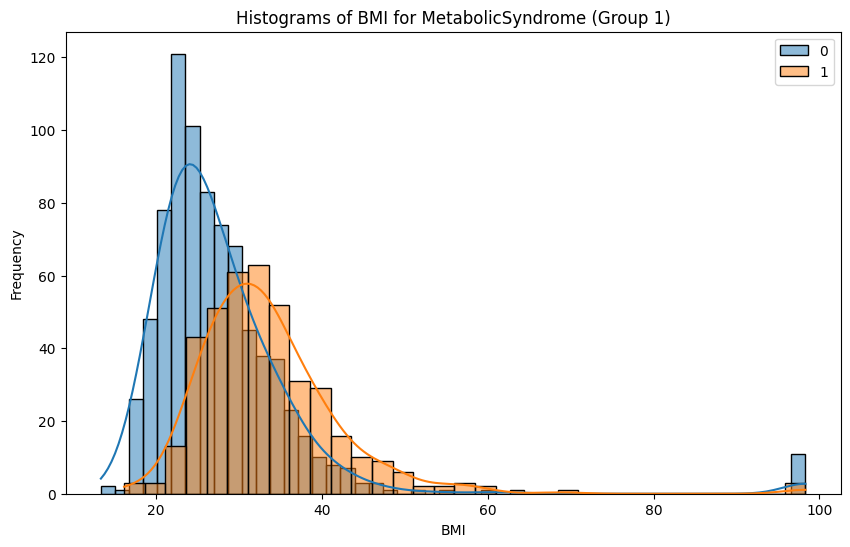

In [74]:
trivariant_analysis(df_meta, "Sex", "MetabolicSyndrome", "BMI", group_size = 3, bins = "auto")

Respuesta Male:


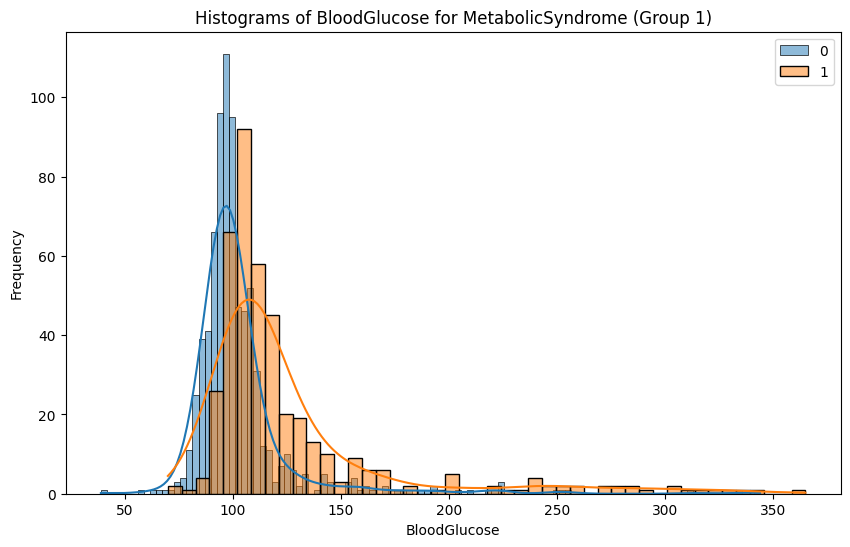

Respuesta Female:


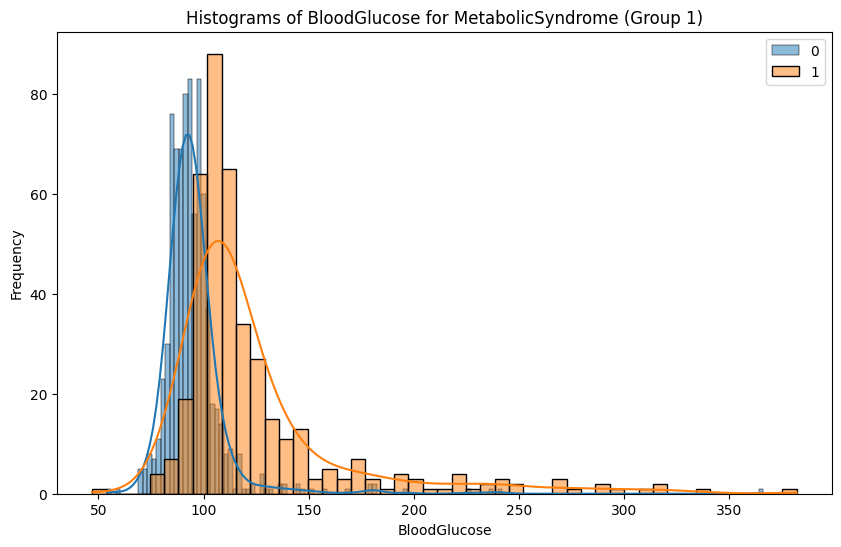

In [75]:
trivariant_analysis(df_meta, "Sex", "MetabolicSyndrome", "BloodGlucose", group_size = 3, bins = "auto")

Respuesta Male:


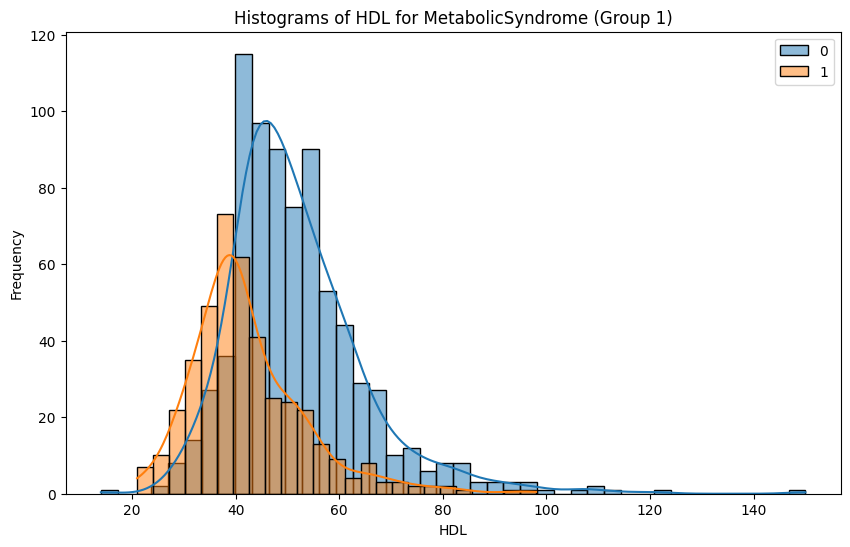

Respuesta Female:


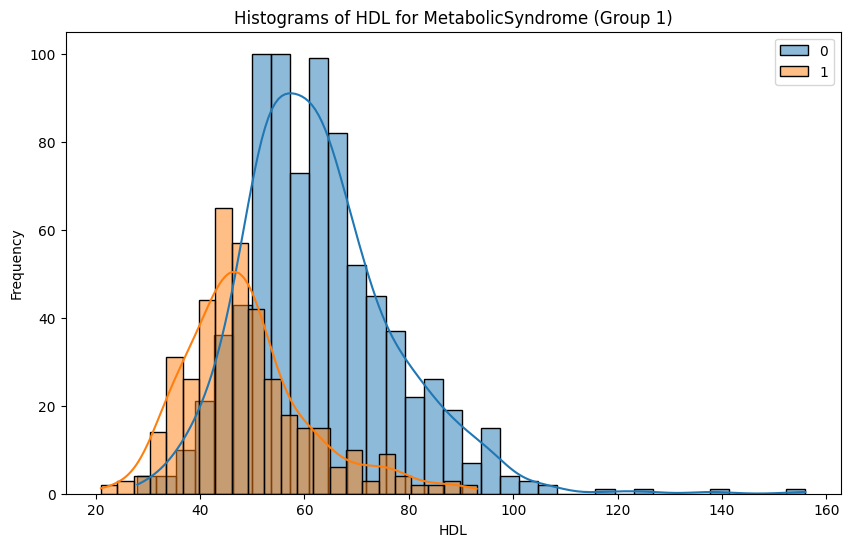

In [76]:
trivariant_analysis(df_meta, "Sex", "MetabolicSyndrome", "HDL", group_size = 3, bins = "auto")

Respuesta Male:


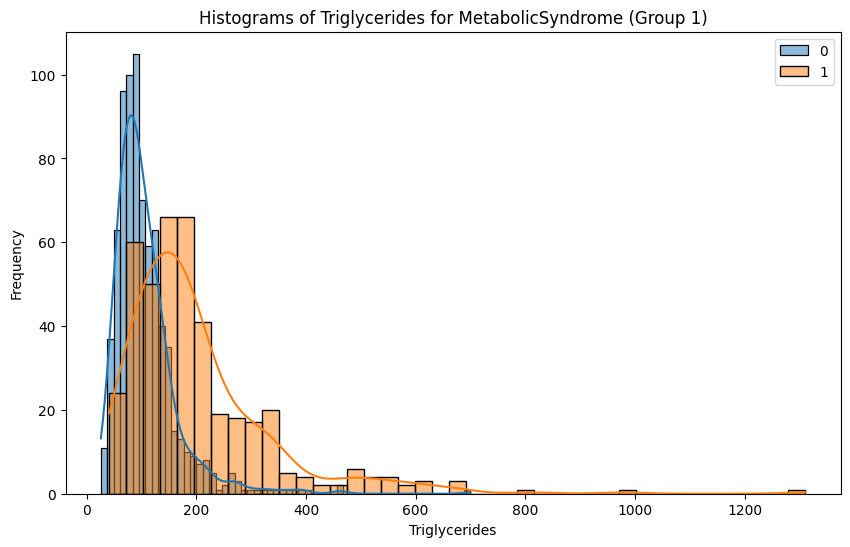

Respuesta Female:


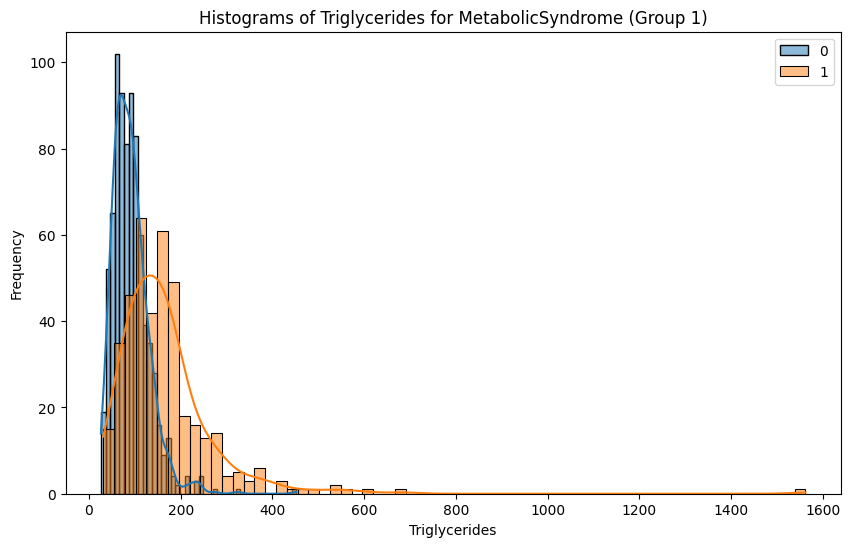

In [77]:
trivariant_analysis(df_meta, "Sex", "MetabolicSyndrome", "Triglycerides", group_size = 3, bins = "auto")

- Se observa que se mantiene practicamente la misma distribución de valores para mujeres y hombres en todos los factores de riesgo de síndrome metabólico. Los pacientes con valores más altos de índice de masa corporal, con circunferencias abdominales más grandes, niveles altos de azúcar y triglicéridos, y bajos niveles HDL parecen ser los más afectados por síndrome metábolico independientemente del sexo.

- Empezamos haciendo el multivariante entre el estado civil y la edad, y tener sindrome metabólico para saber si ésta verdaderamente relacionado con el estado civil o es más un tema de edad.

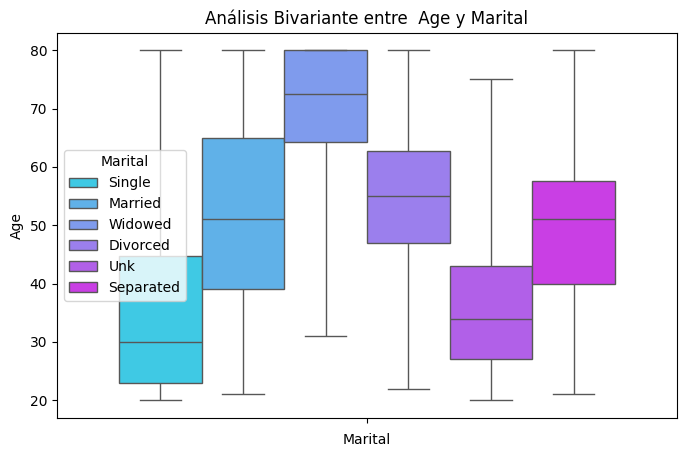

In [78]:
# Hacemos el un boxplot comparando edad con estado civil
bivariante_num(df_meta, "Age", "Marital")

- Observamos que los pacientes solteros tienen un rango de edad menor que los demás pacientes, los pacientes viudos se concentran en rangos de edad mayores con una mediana de más de 70 años. Los pacientes casados, seperados y divorciados parecen tener valores en edades medias.

Respuesta 0:


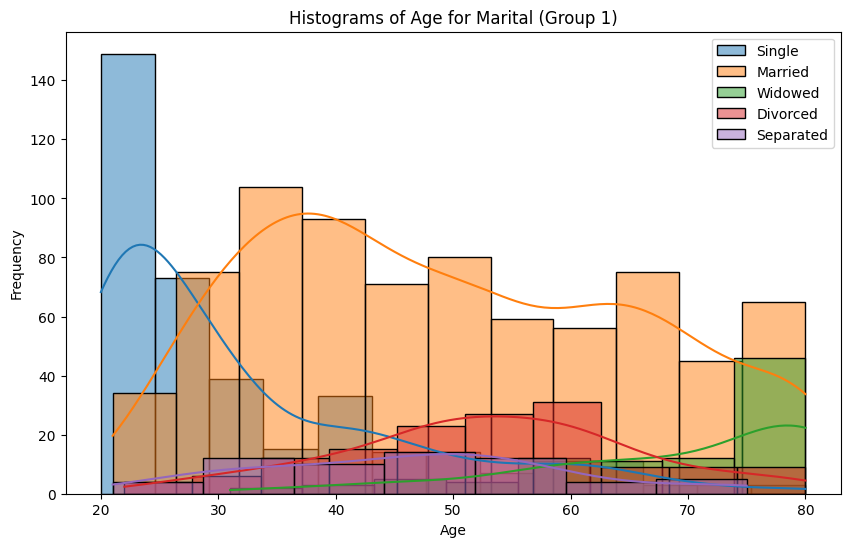

Respuesta 1:


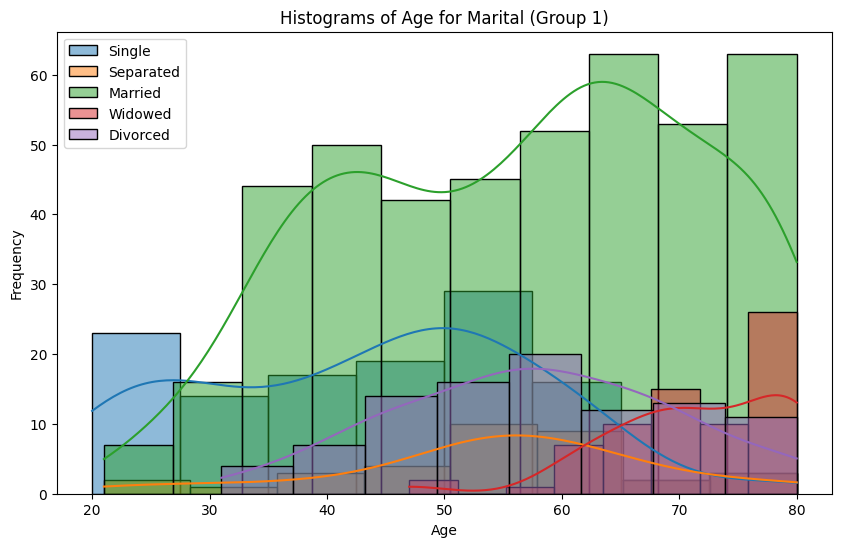

In [79]:
trivariant_analysis(df_meta[df_meta["Marital"]!="Unk"], "MetabolicSyndrome", "Marital", "Age", group_size= 6)

- En el histograma superior, para aquellos sin síndrome metabólico, hay una mayor frecuencia de personas solteras en edades más jóvenes. Las categorías de casados y divorciados muestran una distribución más amplia de edades, con picos en la mediana edad y una disminución gradual hacia edades más avanzadas.
- En el histograma inferior, correspondiente a personas con síndrome metabólico, parece haber una menor cantidad de personas solteras y una mayor frecuencia de personas casadas, viudas y divorciadas en rangos de edad mayores en comparación con el grupo sin síndrome metabólico.
- Podemos concluir que efectivamente la edad es lo que verdaderamente influye en tener sindrome metabólico o no. En el primer histograma de pacientes sanos los pacientes son mucho más jóvenes sin importar el estado civil, mientras que el segundo histograma de pacientes enfermos se ve como la gran mayoría son de edades más avanzadas. 

In [80]:
df_soltero = df_meta.loc[df_meta.Marital == "Single"].copy()
df_casado= df_meta.loc[df_meta.Marital == "Married"].copy()
df_viudo= df_meta.loc[df_meta.Marital == "Widowed"].copy()
df_separado = df_meta.loc[df_meta.Marital == "Separated"].copy()
df_divorciado = df_meta.loc[df_meta.Marital == "Divorced"].copy()

- Hacemos un histograma entre edad y sindrome metabolico para cada estado civil

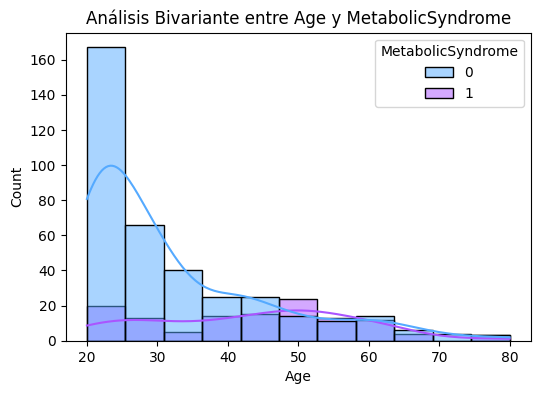

In [81]:
histograma_bivariante(df_soltero, "Age", "MetabolicSyndrome")

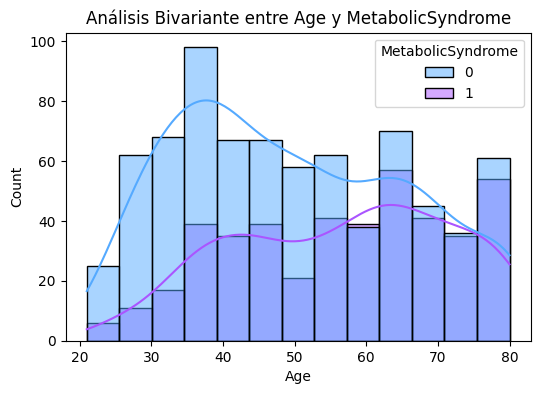

In [82]:
histograma_bivariante(df_casado, "Age", "MetabolicSyndrome")

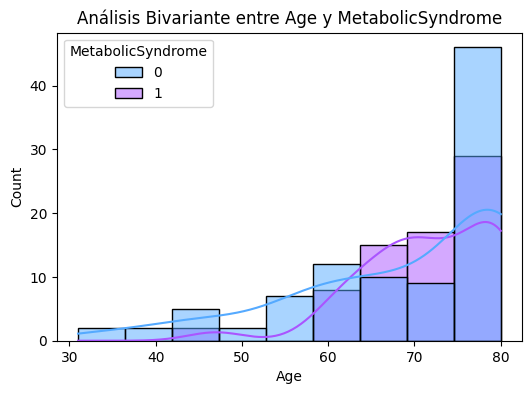

In [83]:
histograma_bivariante(df_viudo, "Age", "MetabolicSyndrome")

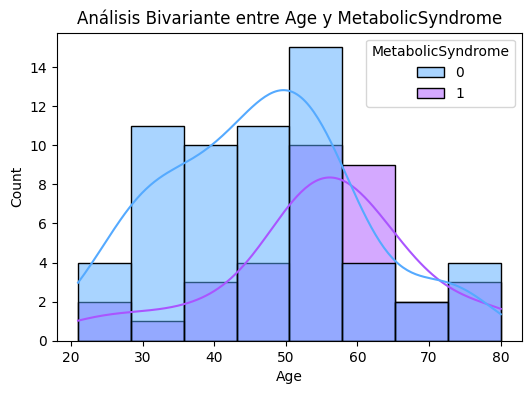

In [84]:
histograma_bivariante(df_separado, "Age", "MetabolicSyndrome")

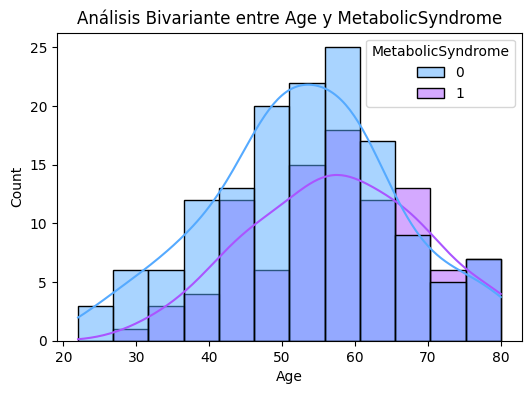

In [85]:
histograma_bivariante(df_divorciado, "Age", "MetabolicSyndrome")

- Observamos claramente que independientemente del estado civil, en cada gráfica vemos que tener sindrome metabólico aumenta conforme aumenta la edad.

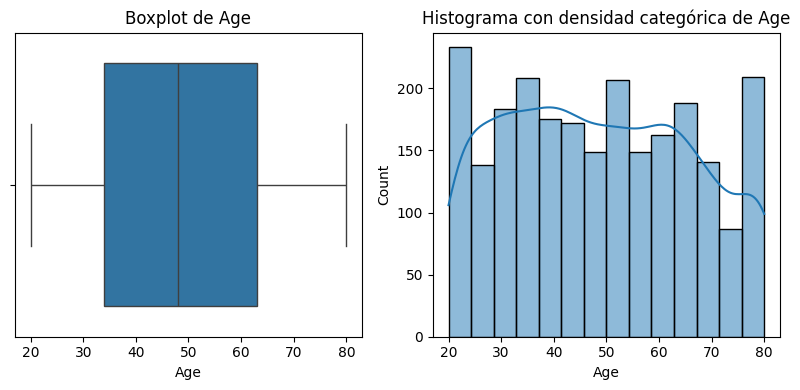

In [86]:
# Haremos grupos de edad par analizar el estado civil para grupo de edad y cada uno con sindrome metabolico
# Hacemos la distribución para ver como hacemos los grupos de edad
boxplot_histograma(df_meta, "Age")

In [87]:
df_meta.Age.describe()

count    2401.000000
mean       48.691795
std        17.632852
min        20.000000
25%        34.000000
50%        48.000000
75%        63.000000
max        80.000000
Name: Age, dtype: float64

In [88]:
# Escojo cuartiles como límites:
bins = [0,25,35,45,55,65,75,85]
df_meta["cat_age"] = pd.cut(df_meta.Age, bins = bins, labels = ["0-25","25-35","35-45","45-55", "55-65", "65-75", "75+"])

In [89]:
def tricategorical_analysis(df, directora, otras, relativa = False, muestra_valores = False):
    col_directora = directora
    col_1 = otras[0]
    col_2 = otras[1]
    diccionario_multivariante = {}
    for valor in df[col_directora].unique():
        diccionario_multivariante[valor] = df.loc[df[col_directora] == valor,[col_2,col_1]] 

    for valor,df_datos in diccionario_multivariante.items():
        print(f"Respuesta {valor}:")
        bivariante_cat(df_datos,col_2,col_1, show_values= True)

Respuesta 0-25:


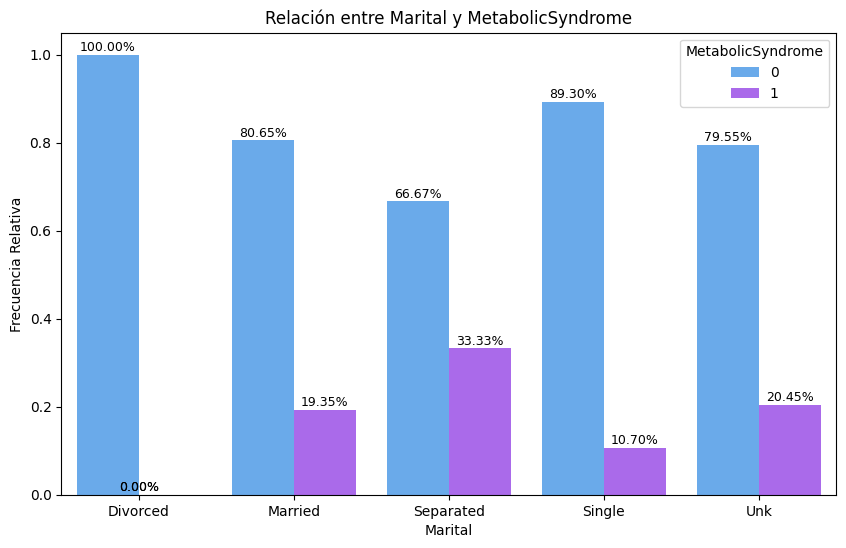

Respuesta 35-45:


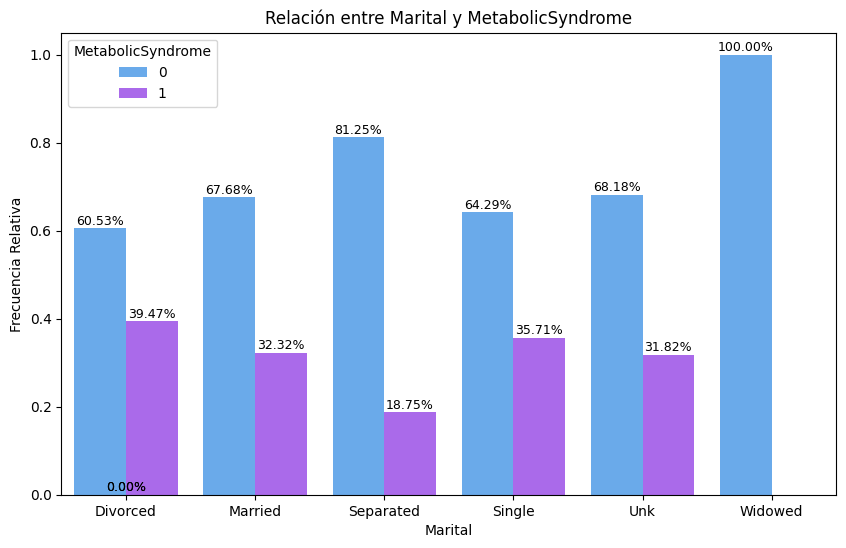

Respuesta 45-55:


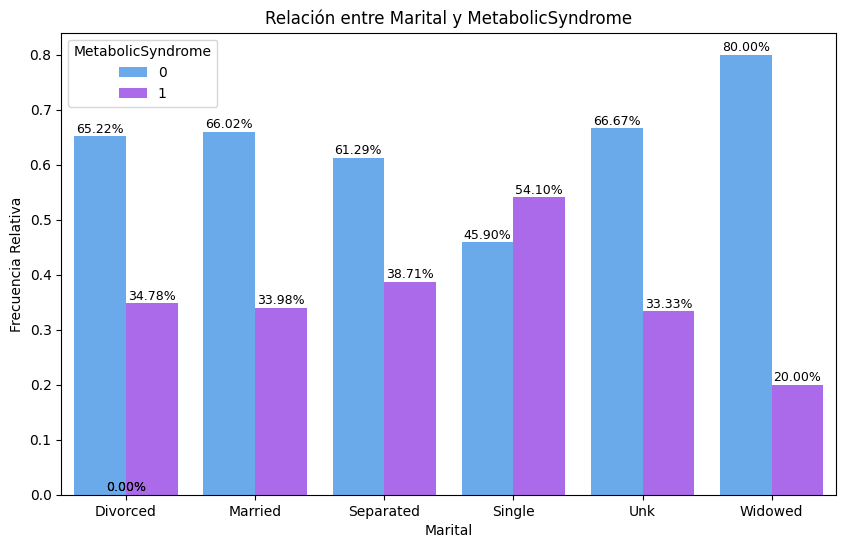

Respuesta 75+:


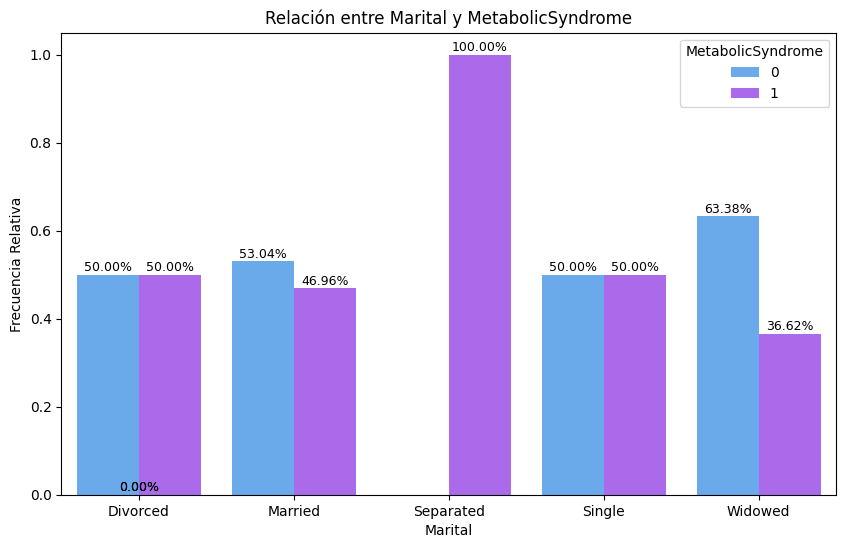

Respuesta 25-35:


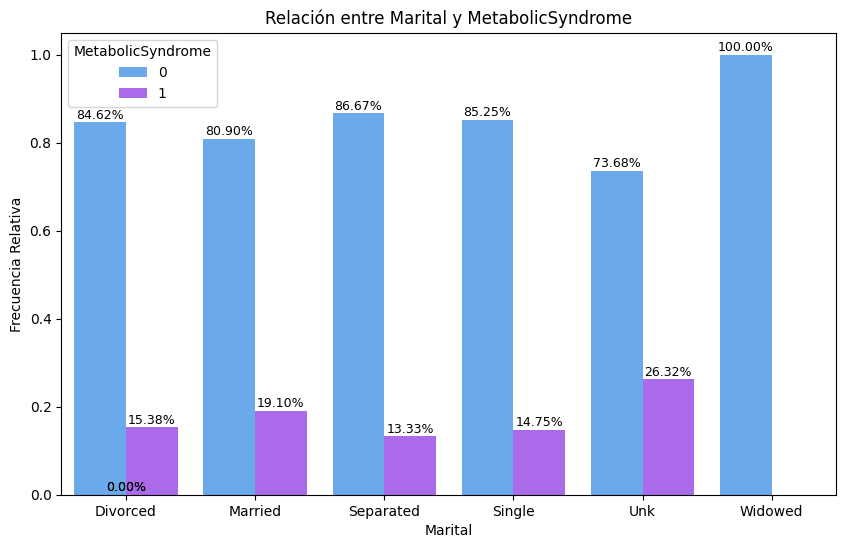

Respuesta 65-75:


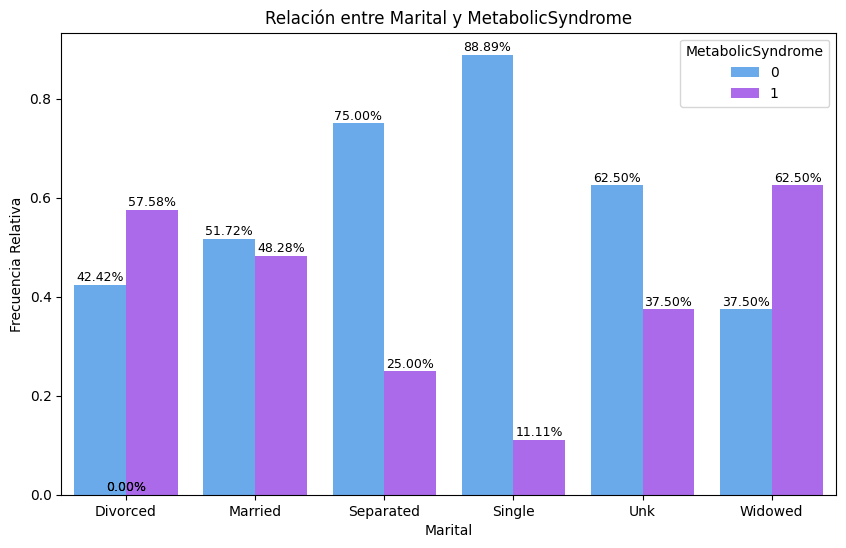

Respuesta 55-65:


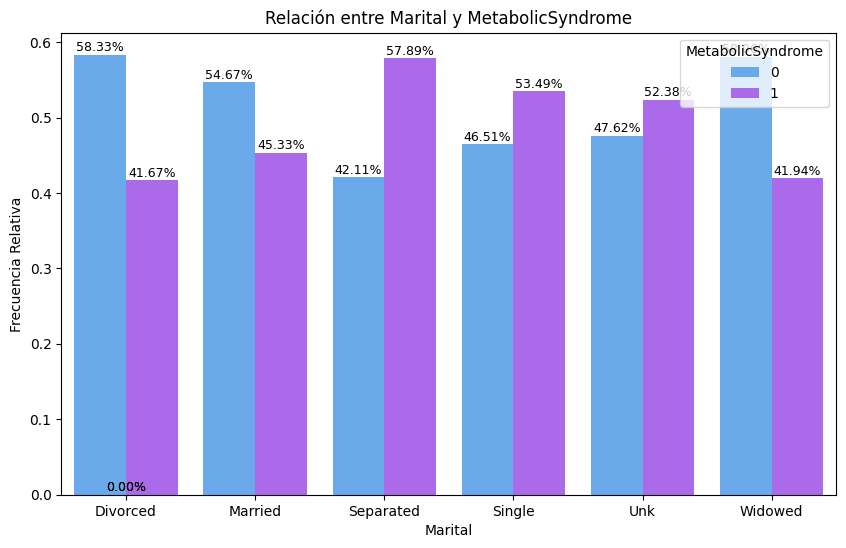

In [90]:
tricategorical_analysis(df_meta, "cat_age", otras = ["MetabolicSyndrome", "Marital",], muestra_valores = True)

- Con éste último análasis agrupando por rangos de edad, podemos confirmar que:
- El grupo de menores de 25 años tiene más de un 80% de pacientes sanos en cualquier estado civil.
- El grupo de entre 25 a 35 parece mantener la misma tendencia que el anterior, y llama la atención que el 100% de los pacientes viudos este sano.
- En los pacientes con edades entre los 35 y 45 se observa que no existe ningun paciente viudo con sindrome metabólico, pero que en este rango de edad ya empieza un ligero aumento de los pacientes con sindrome metabólico en todos los estados civiles.
- Entre 45 y 55 ya observamos un cambio total, los pacientes sanos bajan hasta un 60% en cualquier estado civil, y en el caso particular de los solteros se encuentran en 50% sanos y 50% con sindrome metabólico.
- El grupo de 55-65 años, se equipara la cantidad de pacientes sanos con los que tiene sindrome metabólico, estan practicamente 50% en cada grupo para cualquier estado civil, excepto en el caso de los separados y solteros donde es mayor la cantidad de pacientes enfermos. **Son el grupo de edad con más porcentanje de pacientes con sindrome metabólico**
- Los pacientes de 65 a 75 años, vemos que los pacientes viudos con sindrome metabólico alcanzan el 80%, los casados siguen manteniendo un porcentanje igualado.
- Por último los pacientes de más de 75 años tienen unos porcentajes de pacientes con y sin sindrome metabólico bastante igualado.

**Concluimos que la edad es lo que realmente influye en tener sindrome metabólico y no el estado civil**

**Realizamos un análisis trivariado considerando "MetabolicSyndrome", "Race" y "WaistCirc"**

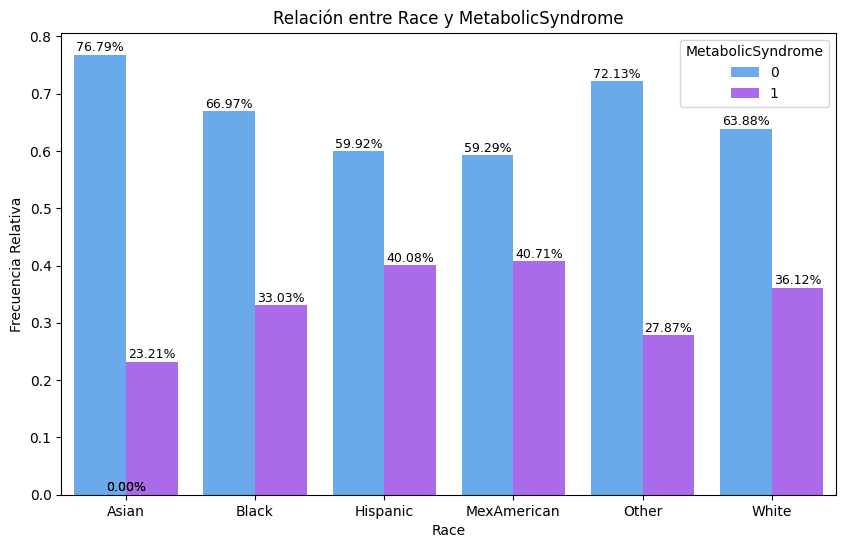

In [91]:
bivariante_cat(df_meta, "Race", "MetabolicSyndrome")

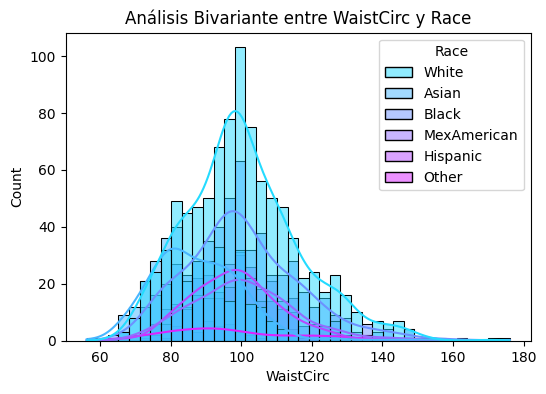

In [92]:
#Hacemos un análisis bivariado entre la circunferencia abdominal y las diferentes razas
histograma_bivariante(df_meta, "WaistCirc", "Race")

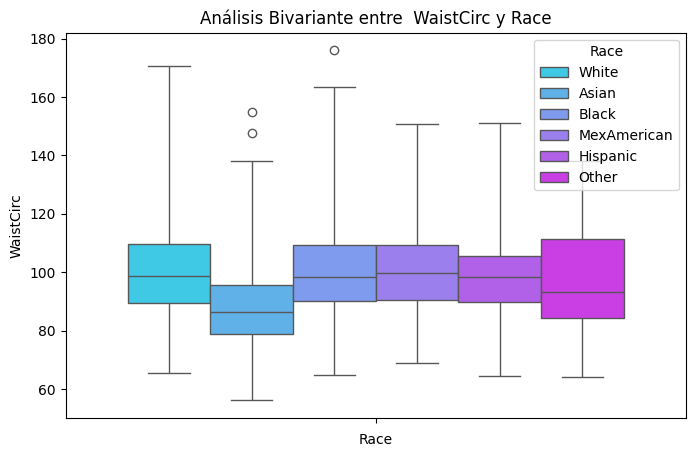

In [93]:
bivariante_num(df_meta, "WaistCirc", "Race")

- Observamos que los pacientes asiaticos son los que tiene una circunferencia abdominal más pequeña, en comparación con las demás razas.

In [94]:
grupos = df_meta["Race"].unique() 
raza_por_waistcirc = [df_meta[df_meta["Race"] == grupo]['WaistCirc'] for grupo in grupos] 
raza_por_waistcirc

[0        81.0
 1        80.1
 5       112.5
 10      107.8
 12      106.0
         ...  
 2373    110.2
 2379    142.7
 2383    117.8
 2387    131.4
 2400    106.6
 Name: WaistCirc, Length: 933, dtype: float64,
 2        69.600000
 4        81.100000
 7        80.200000
 23       90.800000
 25      104.200000
            ...    
 2382     69.500000
 2385     72.000000
 2388     80.100000
 2394     74.000000
 2397     98.307254
 Name: WaistCirc, Length: 349, dtype: float64,
 3       120.400000
 6        78.600000
 8        98.307254
 9        99.000000
 15       89.000000
            ...    
 2364    102.100000
 2365    142.600000
 2369    107.200000
 2378    116.300000
 2391     98.200000
 Name: WaistCirc, Length: 548, dtype: float64,
 11       97.0
 14       92.9
 17      118.6
 22      111.0
 26       95.1
         ...  
 2390     92.6
 2393     96.0
 2395     98.5
 2398    100.8
 2399    106.6
 Name: WaistCirc, Length: 253, dtype: float64,
 13       82.7
 19       90.1
 20       97

In [95]:
f_val, p_val = f_oneway(*raza_por_waistcirc) 
print("Valor F:", f_val)
print("Valor p:", p_val)
mc = MultiComparison(df_meta['WaistCirc'], df_meta['Race'])
result = mc.tukeyhsd()
print(result)

Valor F: 40.3709173855287
Valor p: 5.6766859747955406e-40
      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1      group2   meandiff p-adj   lower    upper  reject
---------------------------------------------------------------
      Asian       Black  12.7293    0.0   9.7321 15.7266   True
      Asian    Hispanic  10.6324    0.0   7.0351 14.2298   True
      Asian MexAmerican  12.9738    0.0   9.3601 16.5875   True
      Asian       Other   9.1598 0.0003   3.0863 15.2333   True
      Asian       White  12.7422    0.0   9.9961 15.4883   True
      Black    Hispanic  -2.0969 0.4611  -5.4057  1.2119  False
      Black MexAmerican   0.2445 0.9999   -3.082   3.571  False
      Black       Other  -3.5695 0.5163  -9.4767  2.3377  False
      Black       White   0.0129    1.0  -2.3425  2.3684  False
   Hispanic MexAmerican   2.3414 0.5167  -1.5346  6.2174  False
   Hispanic       Other  -1.4726 0.9848  -7.7058  4.7606  False
   Hispanic       White   2.1098 0.3709  -0.97

- Los resultados del análisis bivariante revelan diferencias significativas entre las medias de las circunferencias abdominales de los grupos raciales, como se indica por el valor F de 40.37 y un valor p extremadamente bajo de 5.68e-40. Al examinar los histogramas y boxplots, se observa que la mediana del grupo asiático es considerablemente menor que la de los demás grupos, lo que sugiere que los pacientes asiáticos tienen, en promedio, una circunferencia abdominal más pequeña en comparación con los pacientes de otras razas. Esta variación puede estar relacionada con diversos factores, como hábitos alimenticios y genética asociada a la pertenencia racial. En resumen, podemos concluir que la raza ejerce una influencia significativa en las medidas de circunferencia abdominal, destacando la importancia de considerar estos factores al interpretar los resultados y al abordar la salud abdominal en distintos grupos poblacionales.

Respuesta 0:


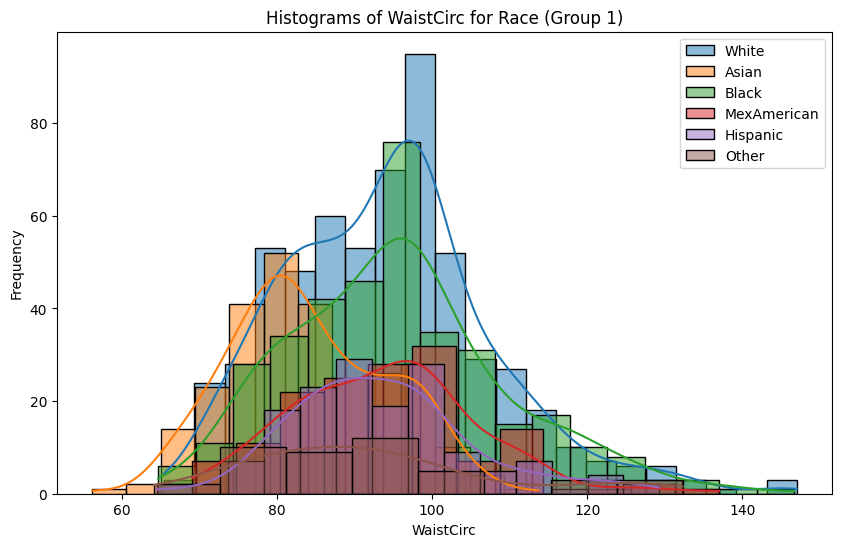

Respuesta 1:


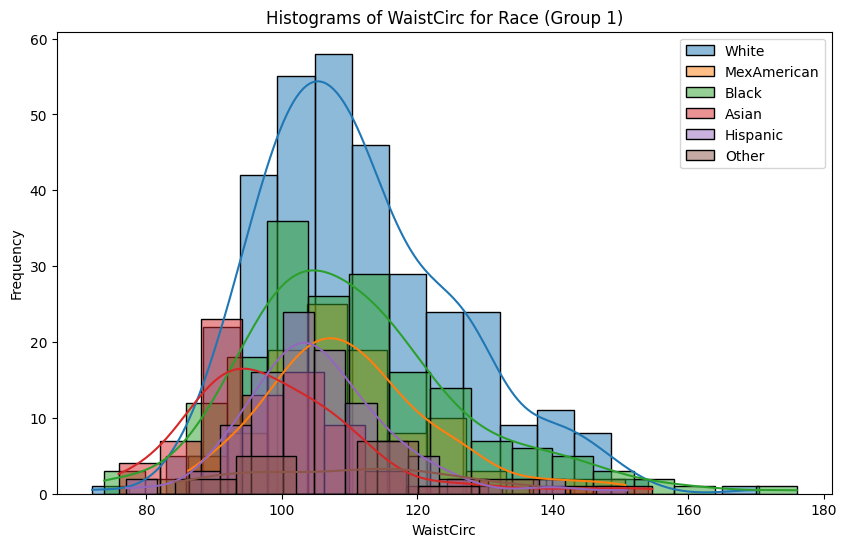

In [96]:
#Ahora hacemos un histograma y comparamos las tres variables directamente, haciendo dos gráficos, uno para los
#sanos y otra para los pacientes con sindrome metabolico
trivariant_analysis(df_meta, "MetabolicSyndrome", "Race", "WaistCirc", group_size= 6)

In [97]:
#Categorizamos los pacientes según la bibliografía en riesgo normal (< 80cm), riesgo elevado (82-87cm) y riesgo muy elevado (>87)
bins = [0,82,87,200]
df_meta["cat_waist"] = pd.cut(df_meta.WaistCirc, bins = bins, labels = ["Normal", "RiesgoElevado", "RiesgoMuyElevado"])

Respuesta Normal:


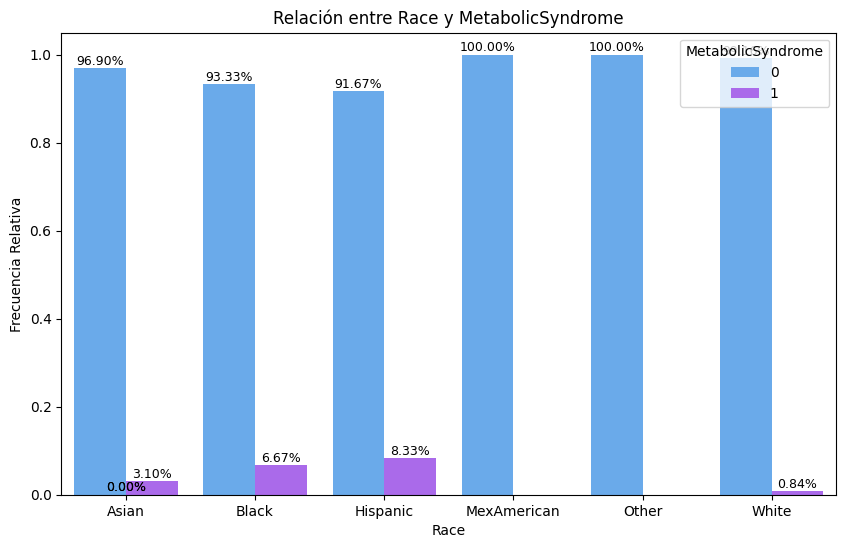

Respuesta RiesgoMuyElevado:


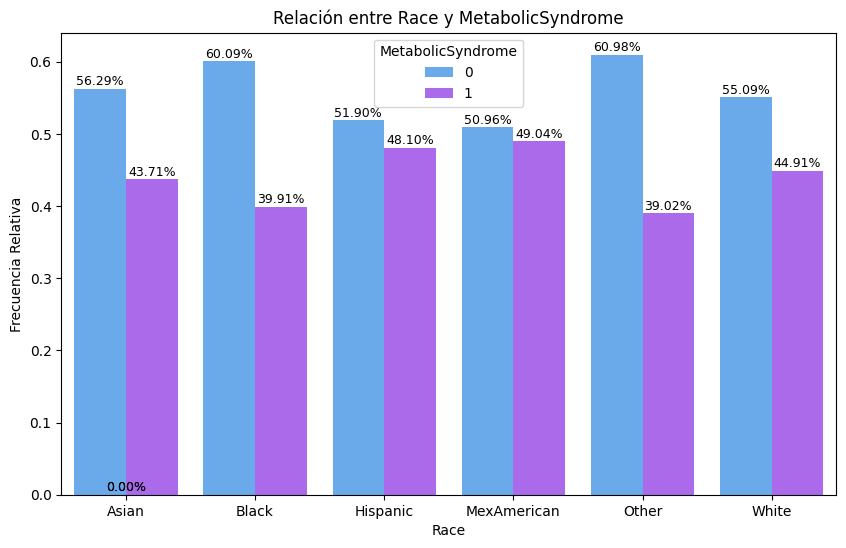

Respuesta RiesgoElevado:


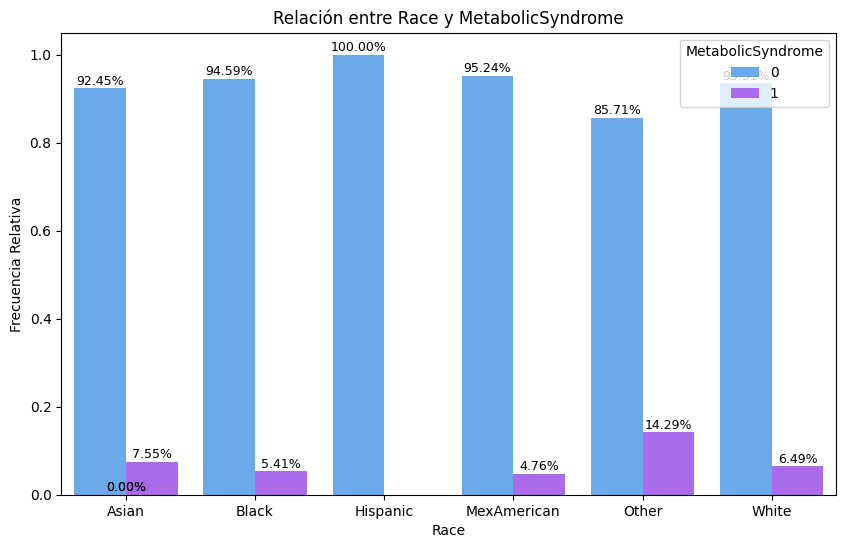

In [98]:
tricategorical_analysis(df_meta, "cat_waist", otras = ["MetabolicSyndrome", "Race",], muestra_valores = True)

- Con este análisis concluimos que el grupo racial no influye en tener síndrome metabólico o no, que esta relacionado en este caso con la circunferencia abdominal, los pacientes con valores bajos de circunfenrencia abdominal, categorizados como bajo riesgo independientemente de la raza en su gran mayoría no tienen síndrome metabólico, mientras que la mitad de los pacientes con riesgo muy elevado padecen esta condición.

- Haremos un mapa de calor para ver la correlación entre los factores de riesgo

<Axes: >

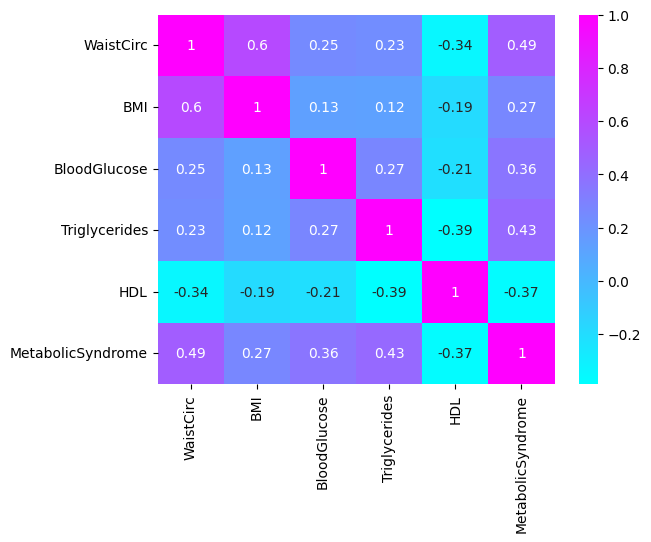

In [99]:
df_factores_riesgo = df_meta[["WaistCirc", "BMI", "BloodGlucose", "Triglycerides", "HDL", "MetabolicSyndrome"]]
sns.heatmap(df_factores_riesgo.corr(), annot = True, cmap= "cool")

- La circunferencia de la cintura (WaistCirc) y el IMC tienen correlaciones positivas moderadamente altas con el síndrome metabólico, lo que indica que valores más altos de estas medidas tienden a asociarse con una mayor incidencia del síndrome.La glucosa en sangre y los triglicéridos también muestran una correlación positiva, lo que sugiere que niveles más altos están relacionados con una mayor prevalencia del síndrome.El HDL, por otro lado, tiene una correlación negativa, lo que podría interpretarse como que niveles más altos de HDL están asociados con una menor prevalencia del síndrome metabólico.




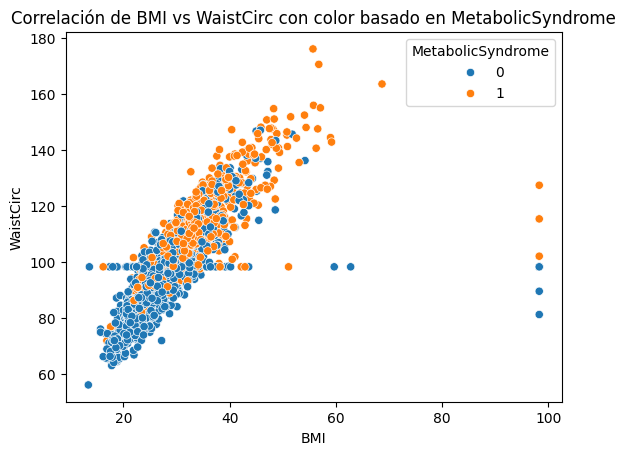

In [100]:
# Hacemos scatterplot para ver la correlación entre el índice de masa corporal y la circunferencia abdominal ya que tenía un alta
#correlación el mapa de calor
sns.scatterplot(df_meta, x = "BMI", y ="WaistCirc", hue = "MetabolicSyndrome")
plt.xlabel("BMI")
plt.ylabel("WaistCirc")
plt.title(f'Correlación de {"BMI"} vs {"WaistCirc"} con color basado en {"MetabolicSyndrome"}')
plt.show()

- Confirmamos que los pacientes diagnosticados con síndrome metabólico tienen un índice de masa corporal más alto y  tienen una circunferencia abdominal mayor que los pacientes sanos.

### CONCLUSIONES

**Identificar patrones, relaciones y posibles predictores del síndrome metabólico, así como comprender cómo estos factores influyen en su aparición o desarrollo**

- El síndrome metabólico es un conjunto de factores de riesgo metabólicos que aumentan la probabilidad de desarrollar enfermedades cardiovasculares, diabetes tipo 2 y otros problemas de salud. Los hallazgos destacan una asociación clara entre varios factores y el desarrollo del síndrome metabólico. Se identificaron como factores de riesgo clave un Índice de Masa Corporal (IMC) elevado, una circunferencia abdominal ampliada, niveles elevados de triglicéridos y azúcar en sangre, y niveles bajos de lipoproteínas de alta densidad (HDL). Estos elementos juegan un papel crucial en la predisposición hacia esta enfermedad.

- **Naturaleza Multifactorial**: La falta de un umbral definitivo y la posibilidad de que pacientes con valores intermedios pertenezcan a ambos grupos apoyan la hipótesis de que el diagnóstico de síndrome metabólico debe basarse en la presencia de más de tres factores de riesgo. Este enfoque respalda la naturaleza multifactorial y compleja del síndrome metabólico. Aunque cada factor de riesgo individual puede estar estrechamente relacionado con la condición, la falta de un límite claro en la mayoría de los casos y la superposición de valores entre pacientes con y sin síndrome metabólico sugieren que la evaluación debe considerar la presencia conjunta de múltiples factores. Este enfoque más holístico permite una identificación más precisa de aquellos individuos que tienen un mayor riesgo de padecer esta enfermedad. Por lo tanto, aunque los análisis bivariados han demostrado asociaciones significativas entre los factores de riesgo y el síndrome metabólico, la ausencia de un umbral claro y la posibilidad de superposición entre grupos de pacientes refuerzan la importancia de considerar múltiples factores en lugar de un único indicador al diagnosticar esta compleja condición metabólica.

- **Albuminuria**: 
La identificación de una alta correlación entre la albuminuria y la presencia del síndrome metabólico es un hallazgo significativo en este análisis. Los datos muestran una asociación estrecha entre valores elevados de albúmina en la orina y el diagnóstico de síndrome metabólico. La albuminuria, o la presencia de niveles elevados de albúmina en la orina, es un marcador conocido de disfunción renal. La observación de que la mayoría de los pacientes diagnosticados con síndrome metabólico también presentan valores altos de albuminuria sugiere una posible relación causal o una conexión directa entre la enfermedad metabólica y el deterioro renal.

Este resultado plantea la hipótesis de que padecer síndrome metabólico puede ser un factor contribuyente al daño renal severo, representado por la presencia de albuminuria. Esta conexión entre ambas condiciones puede tener implicaciones clínicas significativas, ya que sugiere la importancia de monitorear estrechamente la función renal en pacientes con síndrome metabólico y enfocarse en estrategias de prevención y tratamiento que no solo aborden los aspectos metabólicos, sino también la salud renal.

La relación entre el síndrome metabólico y la albuminuria destaca la necesidad de investigaciones adicionales para comprender mejor los mecanismos subyacentes y el impacto clínico de esta asociación. Asimismo, enfatiza la importancia de implementar intervenciones tempranas y medidas preventivas dirigidas no solo a mitigar los factores de riesgo metabólico, sino también a preservar la función renal en pacientes diagnosticados con síndrome metabólico.
***Es una prueba que se debe incluir tanto para el diagnóstico como para le seguimiento de los pacientes con síndrome metabólico***

**¿Las personas obesesas tienen mayor riesgo de sufrir de Sindrome Metabólico?**

Sí, las personas con obesidad tienen un mayor riesgo de desarrollar síndrome metabólico. La obesidad, en particular la acumulación de grasa alrededor de la cintura (obesidad abdominal), está fuertemente asociada con varios componentes del síndrome metabólico, niveles elevados de triglicéridos, niveles bajos de lipoproteínas de alta densidad (HDL o "colesterol bueno"). La obesidad, especialmente la obesidad central o abdominal, es uno de los principales componentes y a menudo está relacionada con varios otros factores de riesgo que conforman el síndrome.

La acumulación de grasa alrededor de los órganos internos, especialmente en el área abdominal, puede desencadenar cambios metabólicos que incluyen la resistencia a la insulina, lo que significa que el cuerpo tiene dificultades para utilizar la insulina de manera efectiva. Esto puede llevar a niveles elevados de azúcar en sangre, así como a alteraciones en los niveles de lípidos y la presión arterial, componentes fundamentales del síndrome metabólico.

Pero debemos dejar claro, **que no todas las personas obesas desarrollarán síndrome metabólico**, la obesidad, especialmente cuando se asocia con una distribución central de grasa, es un factor de riesgo importante y un predictor significativo para el desarrollo de esta afección metabólica. 

**¿Cual es el impacto de altos niveles de azúcar y lípidos en el Sindrome Metábolico?**

Ambos factores, los altos niveles de azúcar en sangre y altos niveles de trigleceridos, están interrelacionados y contribuyen al desarrollo de la resistencia a la insulina, que es una condición en la cual las células del cuerpo tienen dificultades para responder adecuadamente a la insulina, una hormona producida por el páncreas que juega un papel fundamental en el metabolismo de la glucosa (azúcar) en el cuerpo. Cuando una persona tiene resistencia a la insulina, las células no responden de manera eficaz a las señales de la insulina, lo que provoca que el cuerpo produzca más insulina para mantener los niveles de azúcar en sangre dentro de un rango normal. Con el tiempo, esto puede conducir a niveles elevados de azúcar en sangre (hiperglucemia) y, potencialmente, al desarrollo de diabetes tipo 2.

La relación entre la resistencia a la insulina y el síndrome metabólico es bidireccional: la resistencia a la insulina puede ser tanto una causa como una consecuencia del síndrome metabólico. La acumulación de grasa en el tejido adiposo, especialmente alrededor del abdomen, puede desencadenar la resistencia a la insulina. Por otro lado, la resistencia a la insulina también puede contribuir al desarrollo de otros componentes del síndrome metabólico, como la dislipidemia (alteración en los niveles de lípidos en sangre) y la hiperglucemia.

- **Determinar la prevalencia del síndrome metabólico en diferentes grupos demográficos (edad, sexo, raza, estado civil, ingresos, etc.)**
    - Los resultados obtenidos no revelan una relación significativa entre el género y la presencia o ausencia del síndrome metabólico. Esta observación sugiere que, en términos relativos, el síndrome metabólico puede afectar a ambos géneros por igual, sin mostrar una prevalencia notable entre uno u otro.
    
    - El síndrome metabólico parece ser menos común en individuos más jóvenes. En las edades medias, hay una mayor proporción de personas casadas, divorciadas y viudas con síndrome metabólico en comparación con las que no lo tienen.
    **La edad avanzada parece estar asociada con una mayor prevalencia del síndrome metabólico, independientemente del estado civil.**

    - Al examinar de manera bivariada el síndrome metabólico con respecto a la raza, si bien encontramos que la raza tiene un impacto en la presencia de esta enfermedad, consideramos que los hábitos alimenticios, diferencias en el estilo de vida, la dieta, la actividad física y otros factores ambientales ejercen una influencia mayor en el peso corporal que es factor de riesgo más determinante de la predisposición a padecerla, independientemente de si se es blanco, negro o asiático. Por lo que hicimos un estudio más a fondo analizando las medidas de circunferencia abdominal de las diferentes razas y si presentaban sindrome metabólico o no y concluimos que algunos grupos étnicos tienen una mayor predisposición a ciertos aspectos del síndrome metabólico, **pero que la raza por sí sola no es influyente o predictivo para tener sindrome metabólico o no.**

    - La relación entre los ingresos y el síndrome metabólico puede ser compleja y multifacética. Los factores socioeconómicos, incluidos los ingresos, el nivel educativo, el acceso a alimentos saludables, el entorno físico y social, entre otros, pueden influir en el desarrollo del síndrome metabólico. Los datos han sugerido una asociación entre los niveles socioeconómicos más altos y una menor prevalencia del síndrome metabólico, las personas con menores ingresos pueden tener más dificultades para acceder a una alimentación saludable, realizar actividad física regular y recibir atención médica preventiva. Estos factores pueden contribuir al desarrollo de la obesidad, la resistencia a la insulina y otros componentes del síndrome metabólico.






